In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline #import librries

In [2]:
data= pd.read_csv('Loan_Default.csv')
data.head(10)#read data

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
5,24895,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,EXP,864,EXP,35-44,not_inst,70.089286,North,direct,0,40.0
6,24896,2019,cf,Joint,pre,type1,p3,l1,nopc,nob/c,...,EXP,860,EXP,55-64,to_inst,79.109589,North,direct,0,44.0
7,24897,2019,NaN,Female,nopre,type1,p4,l1,nopc,nob/c,...,CIB,863,CIB,55-64,to_inst,86.525974,North,direct,0,42.0
8,24898,2019,cf,Joint,nopre,type1,p3,l1,nopc,nob/c,...,CIB,580,EXP,55-64,to_inst,78.765690,central,direct,0,44.0
9,24899,2019,cf,Sex Not Available,nopre,type3,p3,l1,nopc,nob/c,...,CIB,788,EXP,55-64,to_inst,63.444767,south,direct,0,30.0


In [3]:
data.info() #info about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [4]:
data.duplicated().sum() #check duplicates

0

In [5]:
data.isnull().sum() #check null values

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

In [6]:
data.nunique() #check no of unique values

ID                           148670
year                              1
loan_limit                        2
Gender                            4
approv_in_adv                     2
loan_type                         3
loan_purpose                      4
Credit_Worthiness                 2
open_credit                       2
business_or_commercial            2
loan_amount                     211
rate_of_interest                131
Interest_rate_spread          22516
Upfront_charges               58271
term                             26
Neg_ammortization                 2
interest_only                     2
lump_sum_payment                  2
property_value                  385
construction_type                 2
occupancy_type                    3
Secured_by                        2
total_units                       4
income                         1001
credit_type                       4
Credit_Score                    401
co-applicant_credit_type          2
age                         

In [7]:
data.dtypes #datatypes of column

ID                             int64
year                           int64
loan_limit                    object
Gender                        object
approv_in_adv                 object
loan_type                     object
loan_purpose                  object
Credit_Worthiness             object
open_credit                   object
business_or_commercial        object
loan_amount                    int64
rate_of_interest             float64
Interest_rate_spread         float64
Upfront_charges              float64
term                         float64
Neg_ammortization             object
interest_only                 object
lump_sum_payment              object
property_value               float64
construction_type             object
occupancy_type                object
Secured_by                    object
total_units                   object
income                       float64
credit_type                   object
Credit_Score                   int64
co-applicant_credit_type      object
a

<Axes: xlabel='Gender', ylabel='count'>

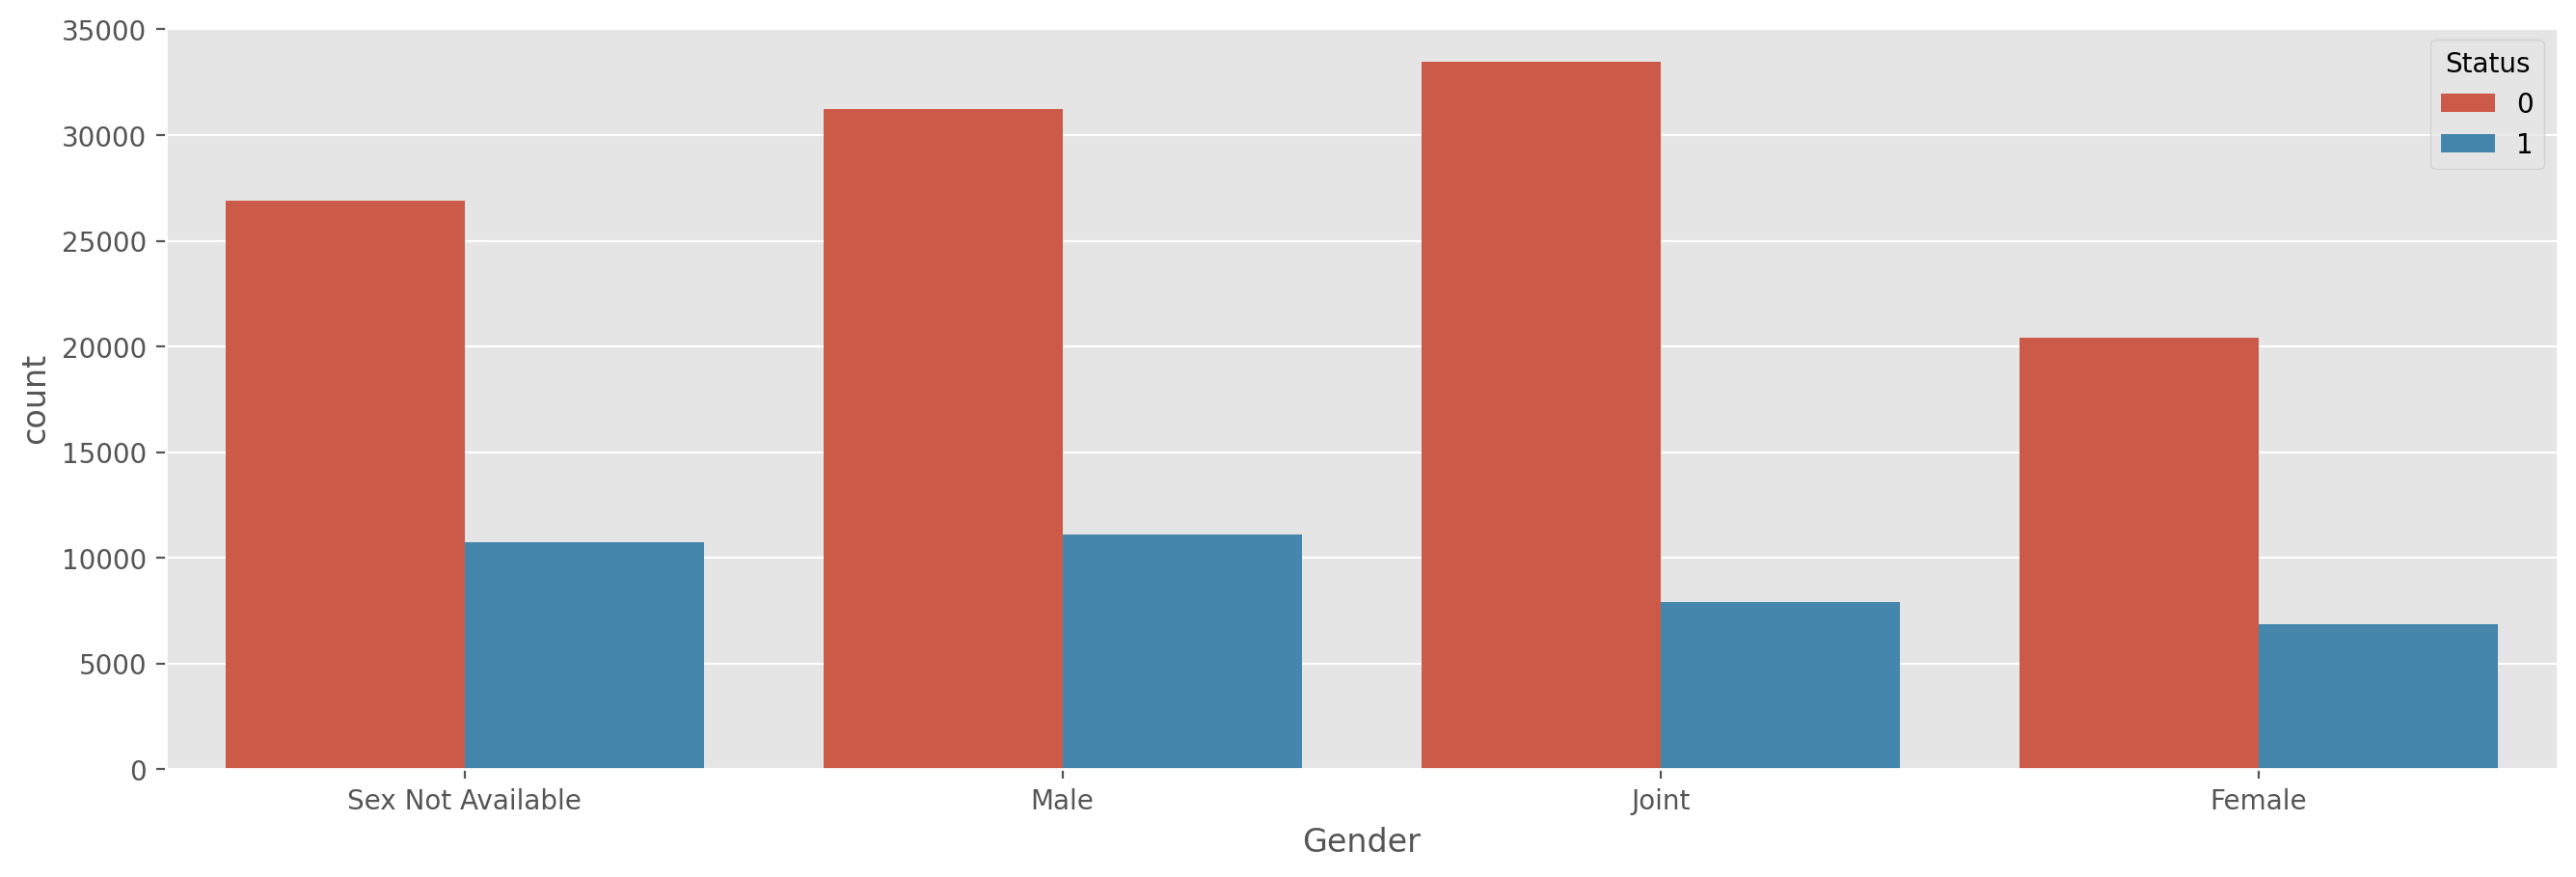

In [8]:
plt.figure(figsize = (16,5), dpi = 200)
sns.countplot(x='Gender',hue='Status',data = data) #joint candidate status is high

<Axes: xlabel='Status', ylabel='count'>

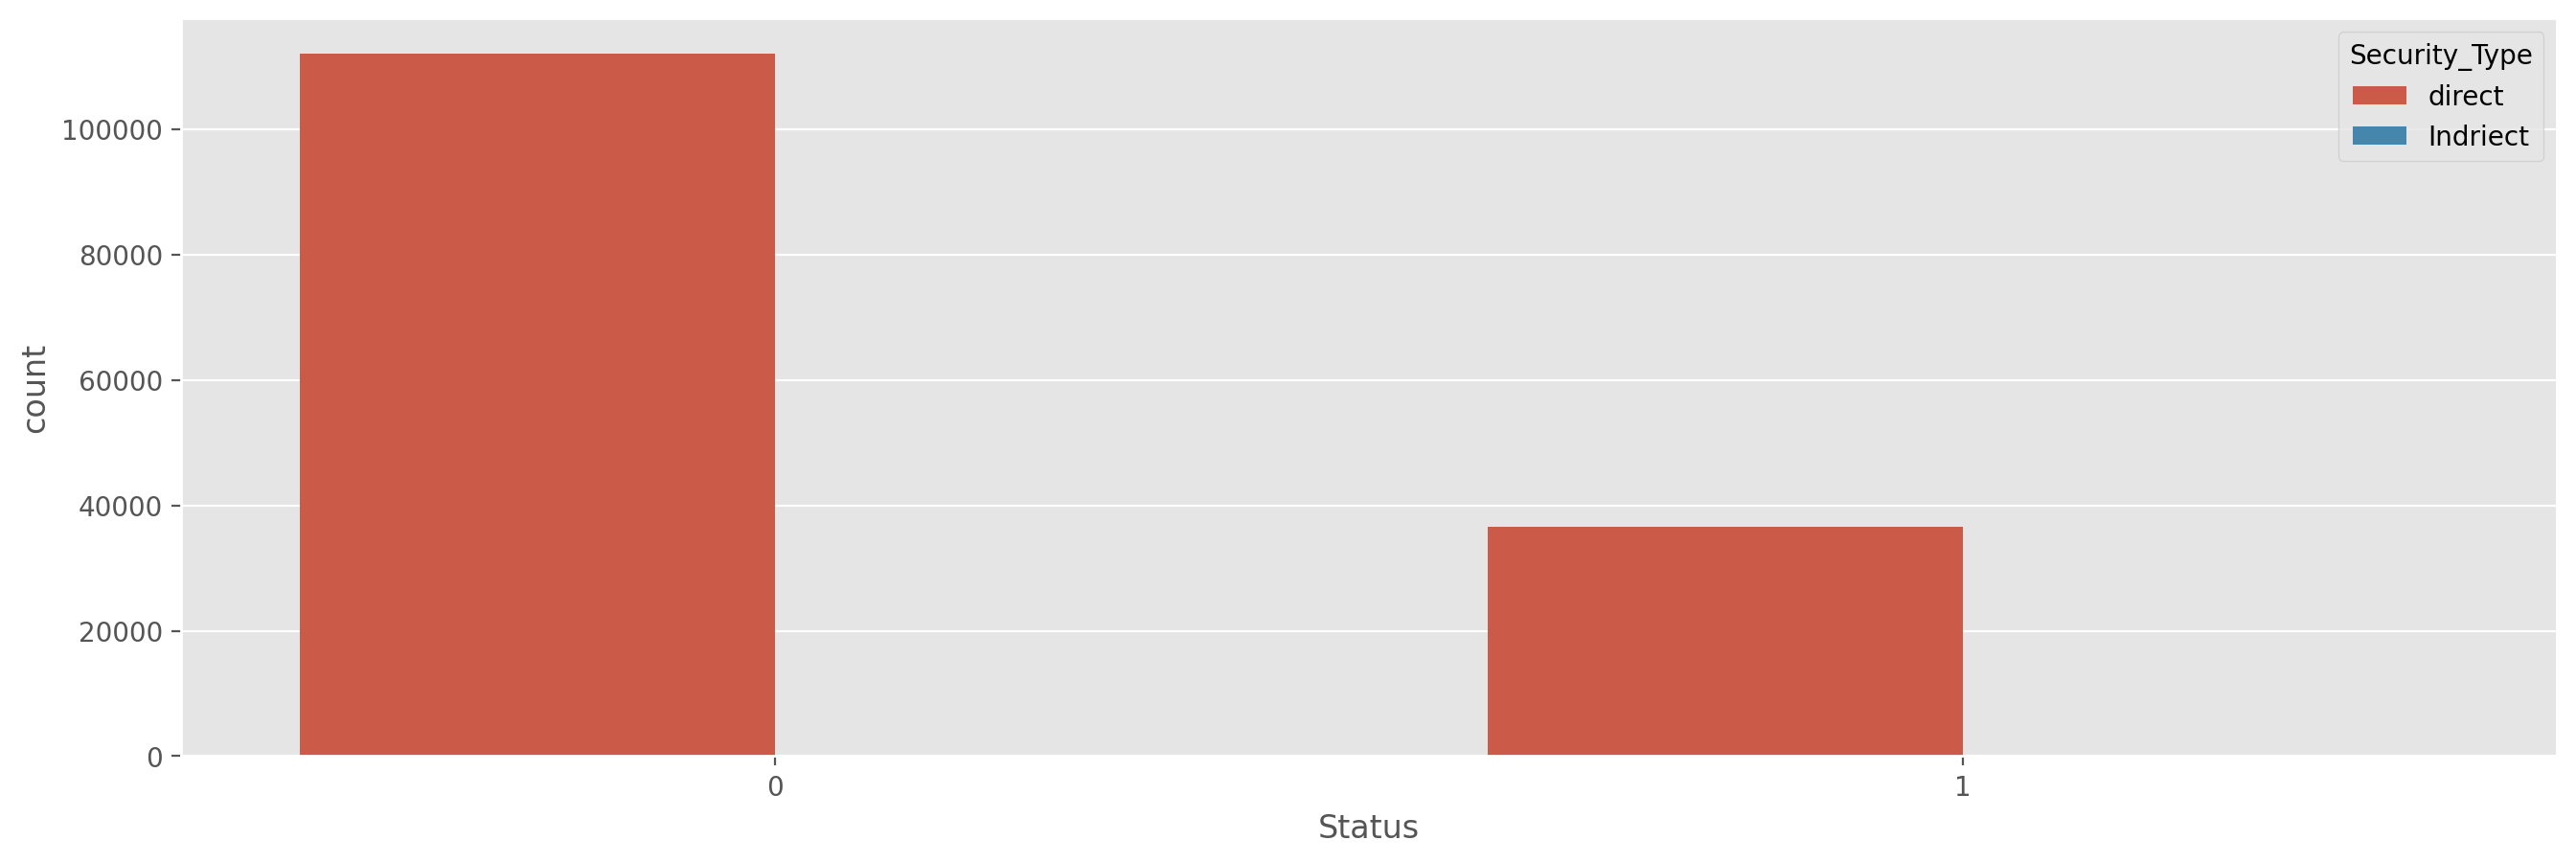

In [9]:
plt.figure(figsize = (16,5), dpi = 200)
sns.countplot(x='Status',hue='Security_Type',data = data) #direct security type have high status

<Axes: xlabel='rate_of_interest', ylabel='income'>

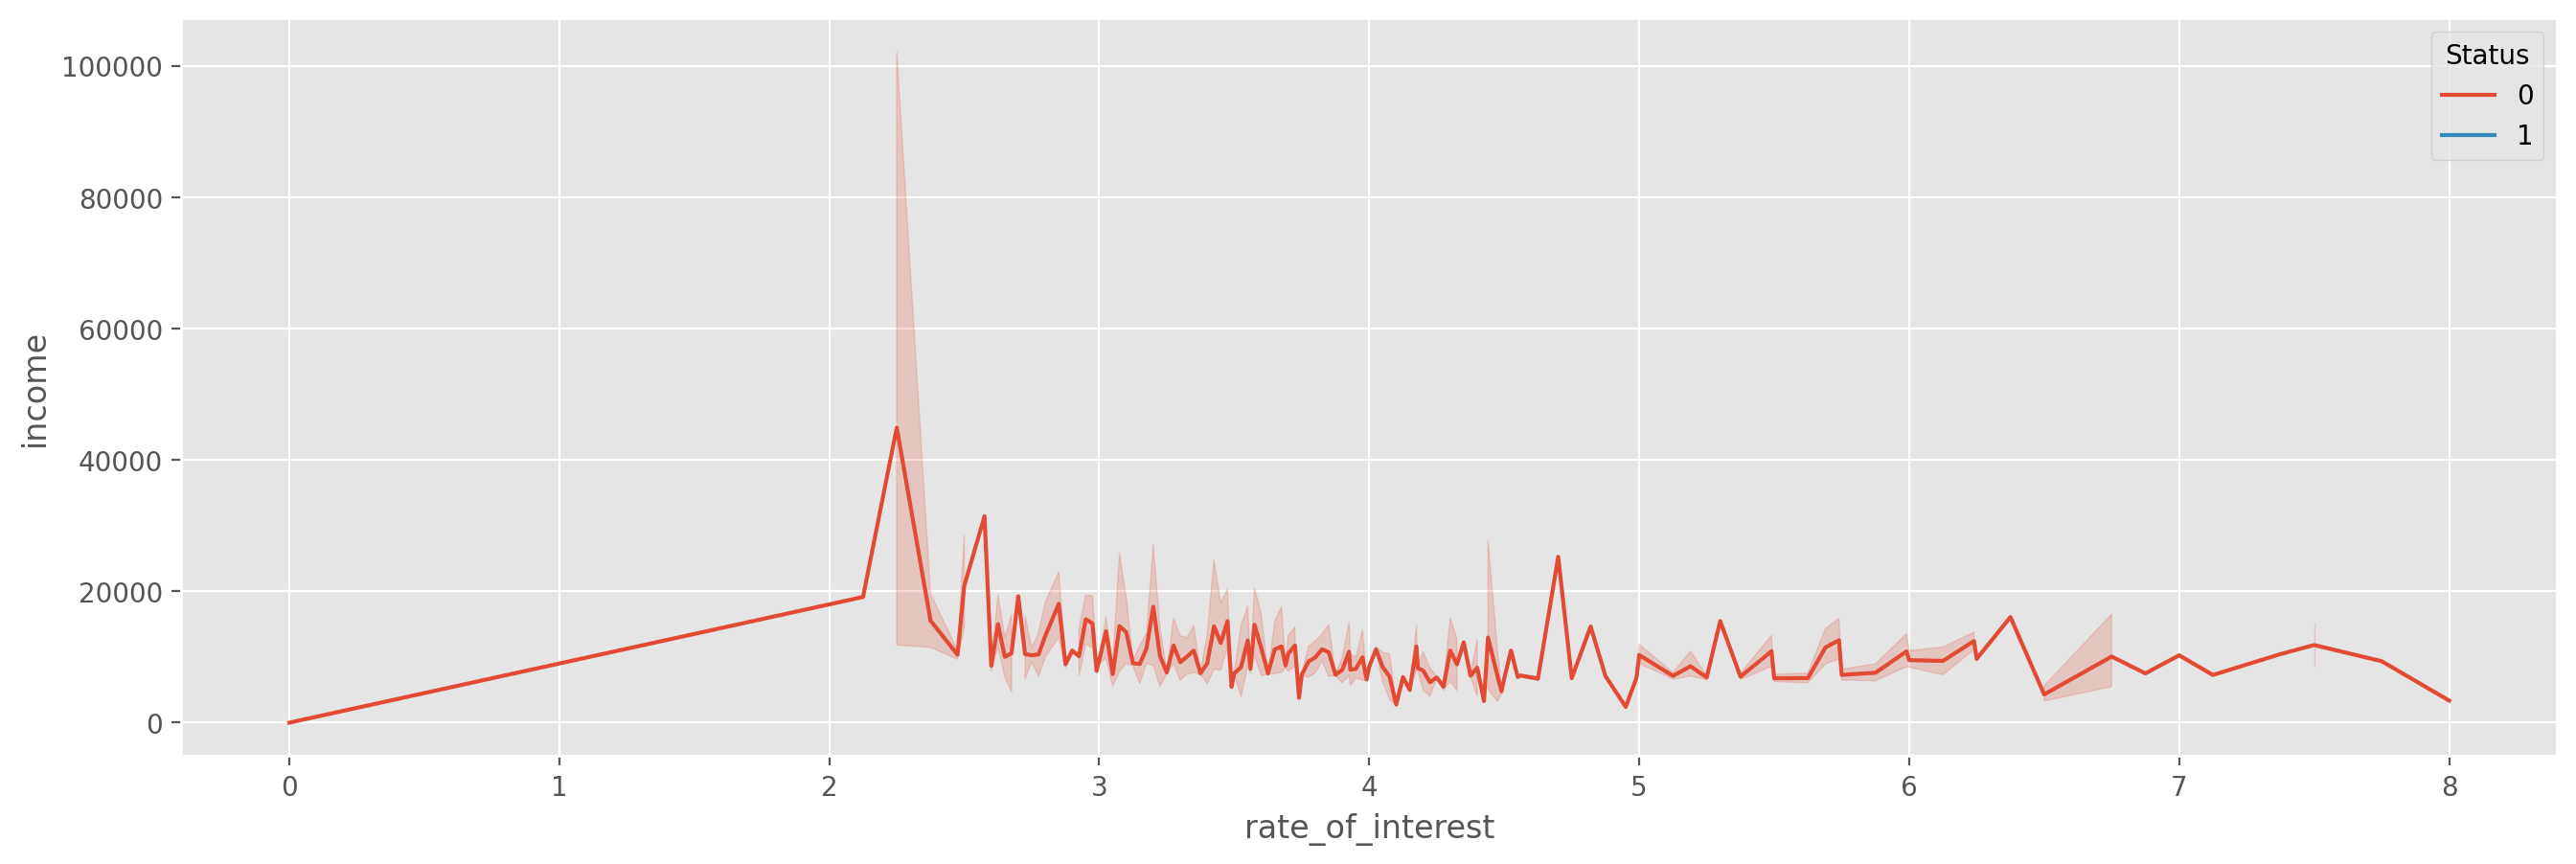

In [10]:
plt.figure(figsize = (16,5), dpi = 200)
sns.lineplot(x='rate_of_interest',y='income',hue='Status',data = data) #high income have high interest rate and status

<Axes: xlabel='loan_amount', ylabel='income'>

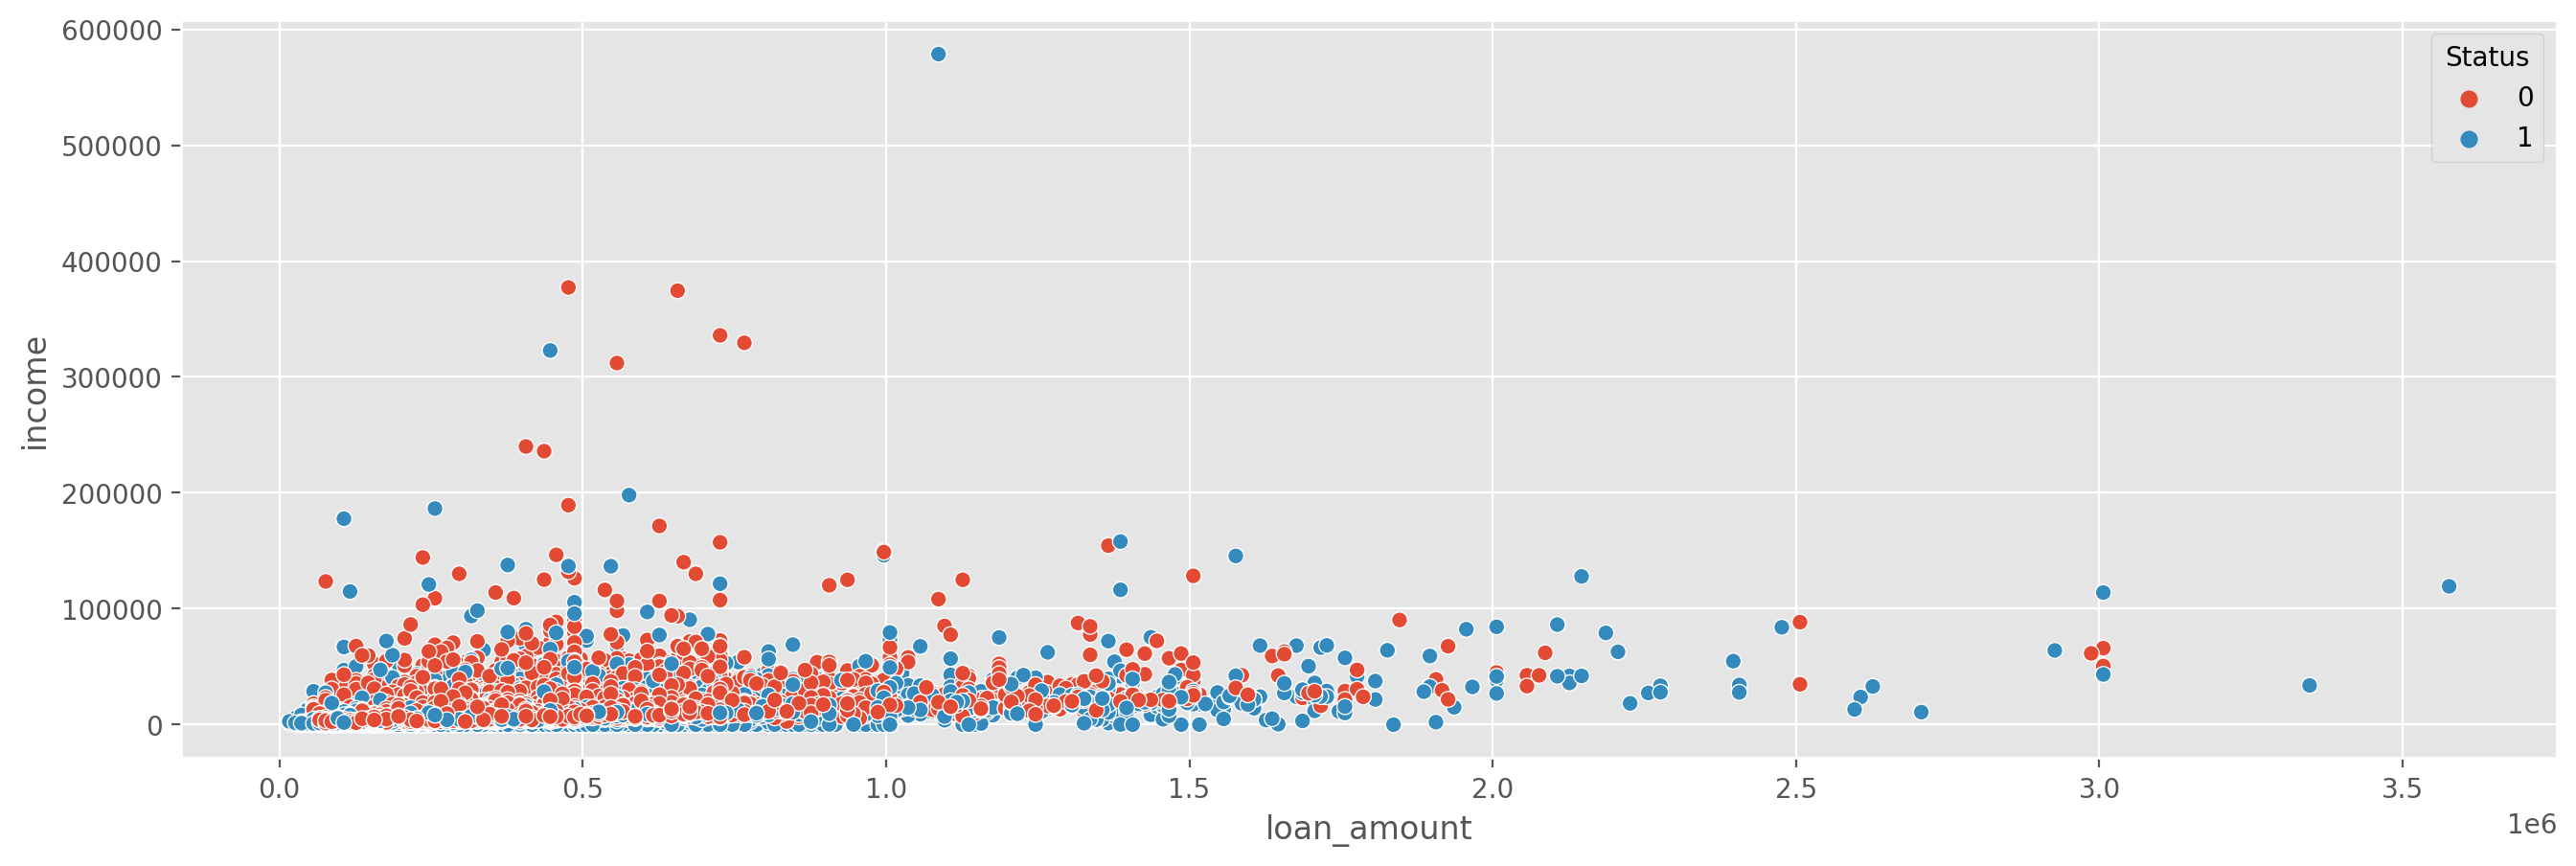

In [11]:
plt.figure(figsize = (16,5), dpi = 200)
sns.scatterplot(x='loan_amount',y='income',hue='Status',data = data) #high loan amount given for high income candidate with high status too

<Axes: xlabel='credit_type', ylabel='Status'>

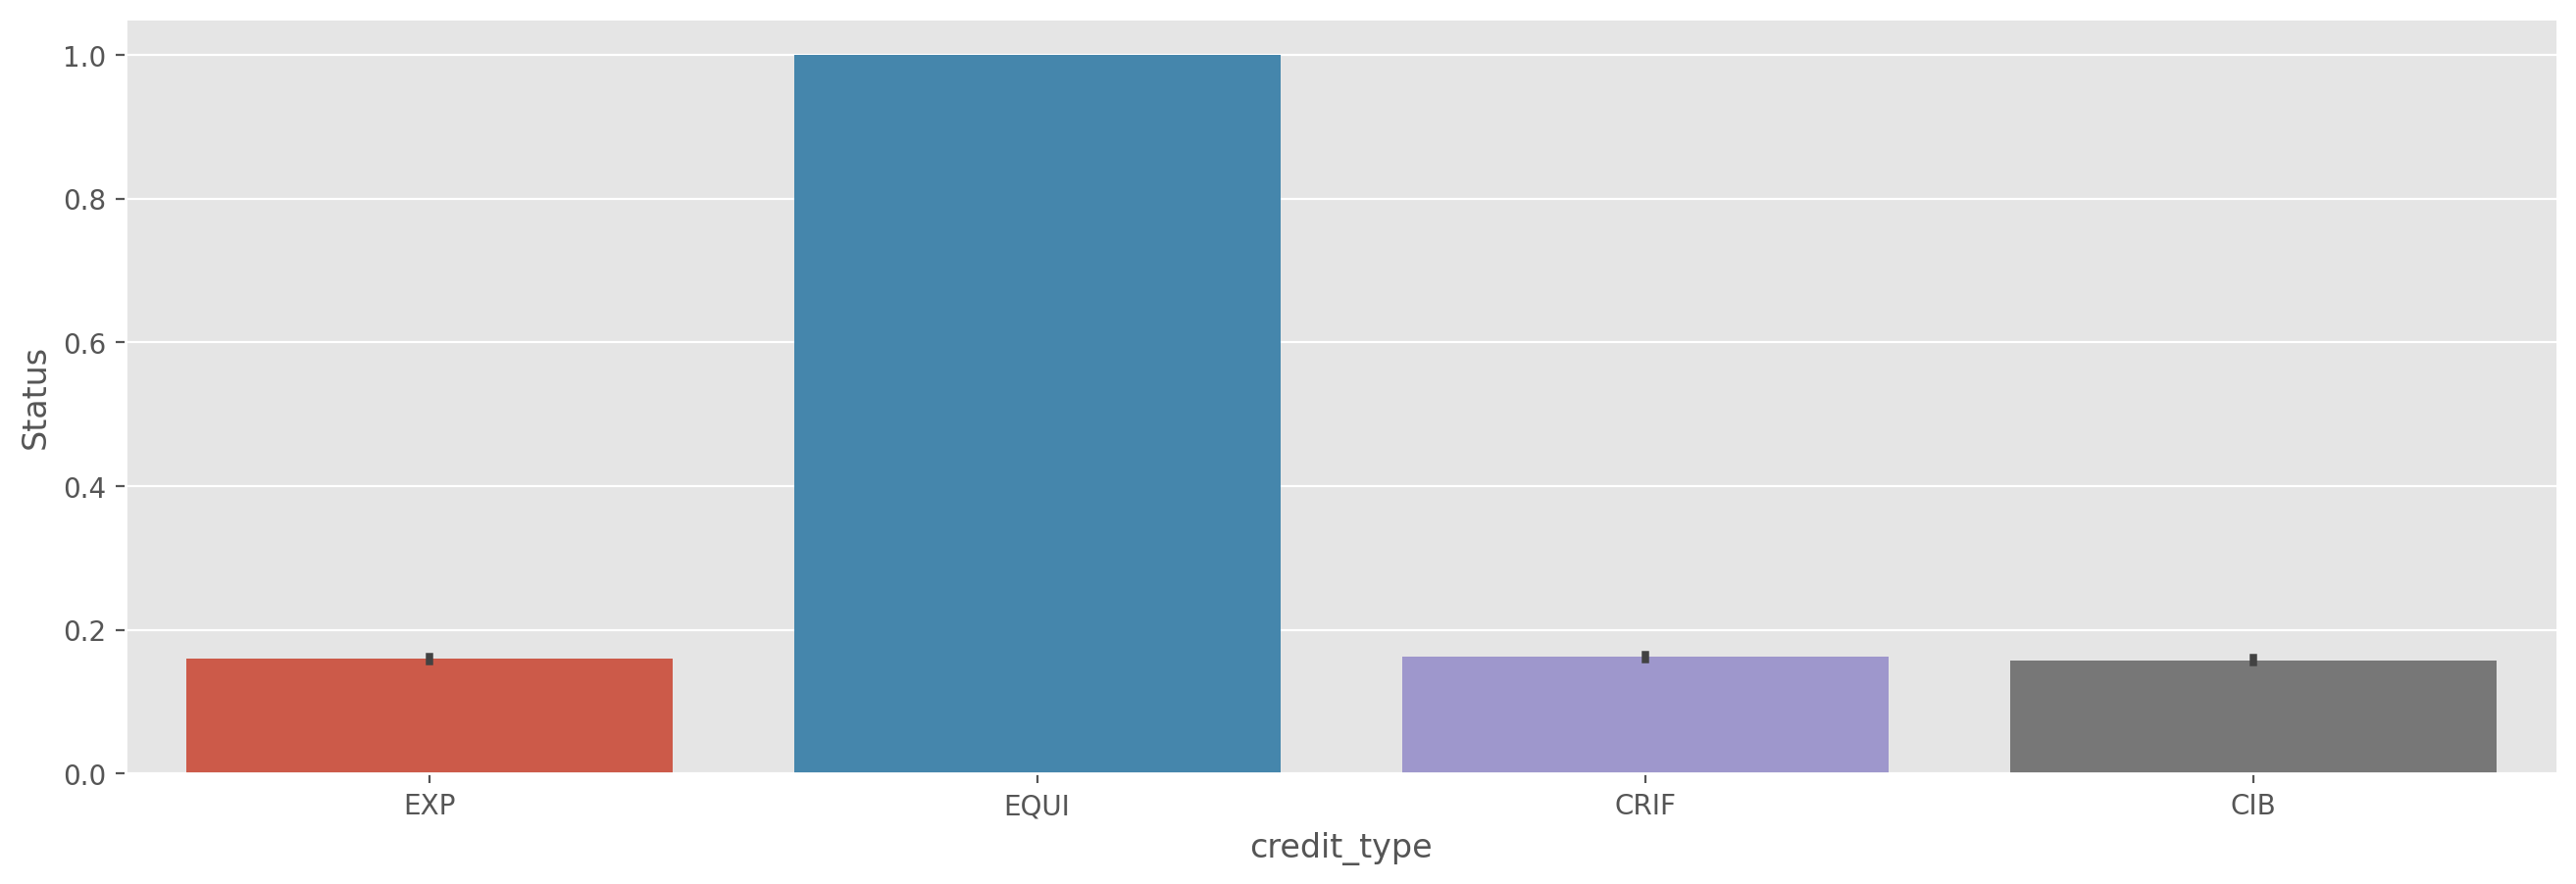

In [12]:
plt.figure(figsize = (16,5), dpi = 200)
sns.barplot(x='credit_type',y='Status',data = data) #EQUI have high status

<Axes: xlabel='rate_of_interest', ylabel='loan_amount'>

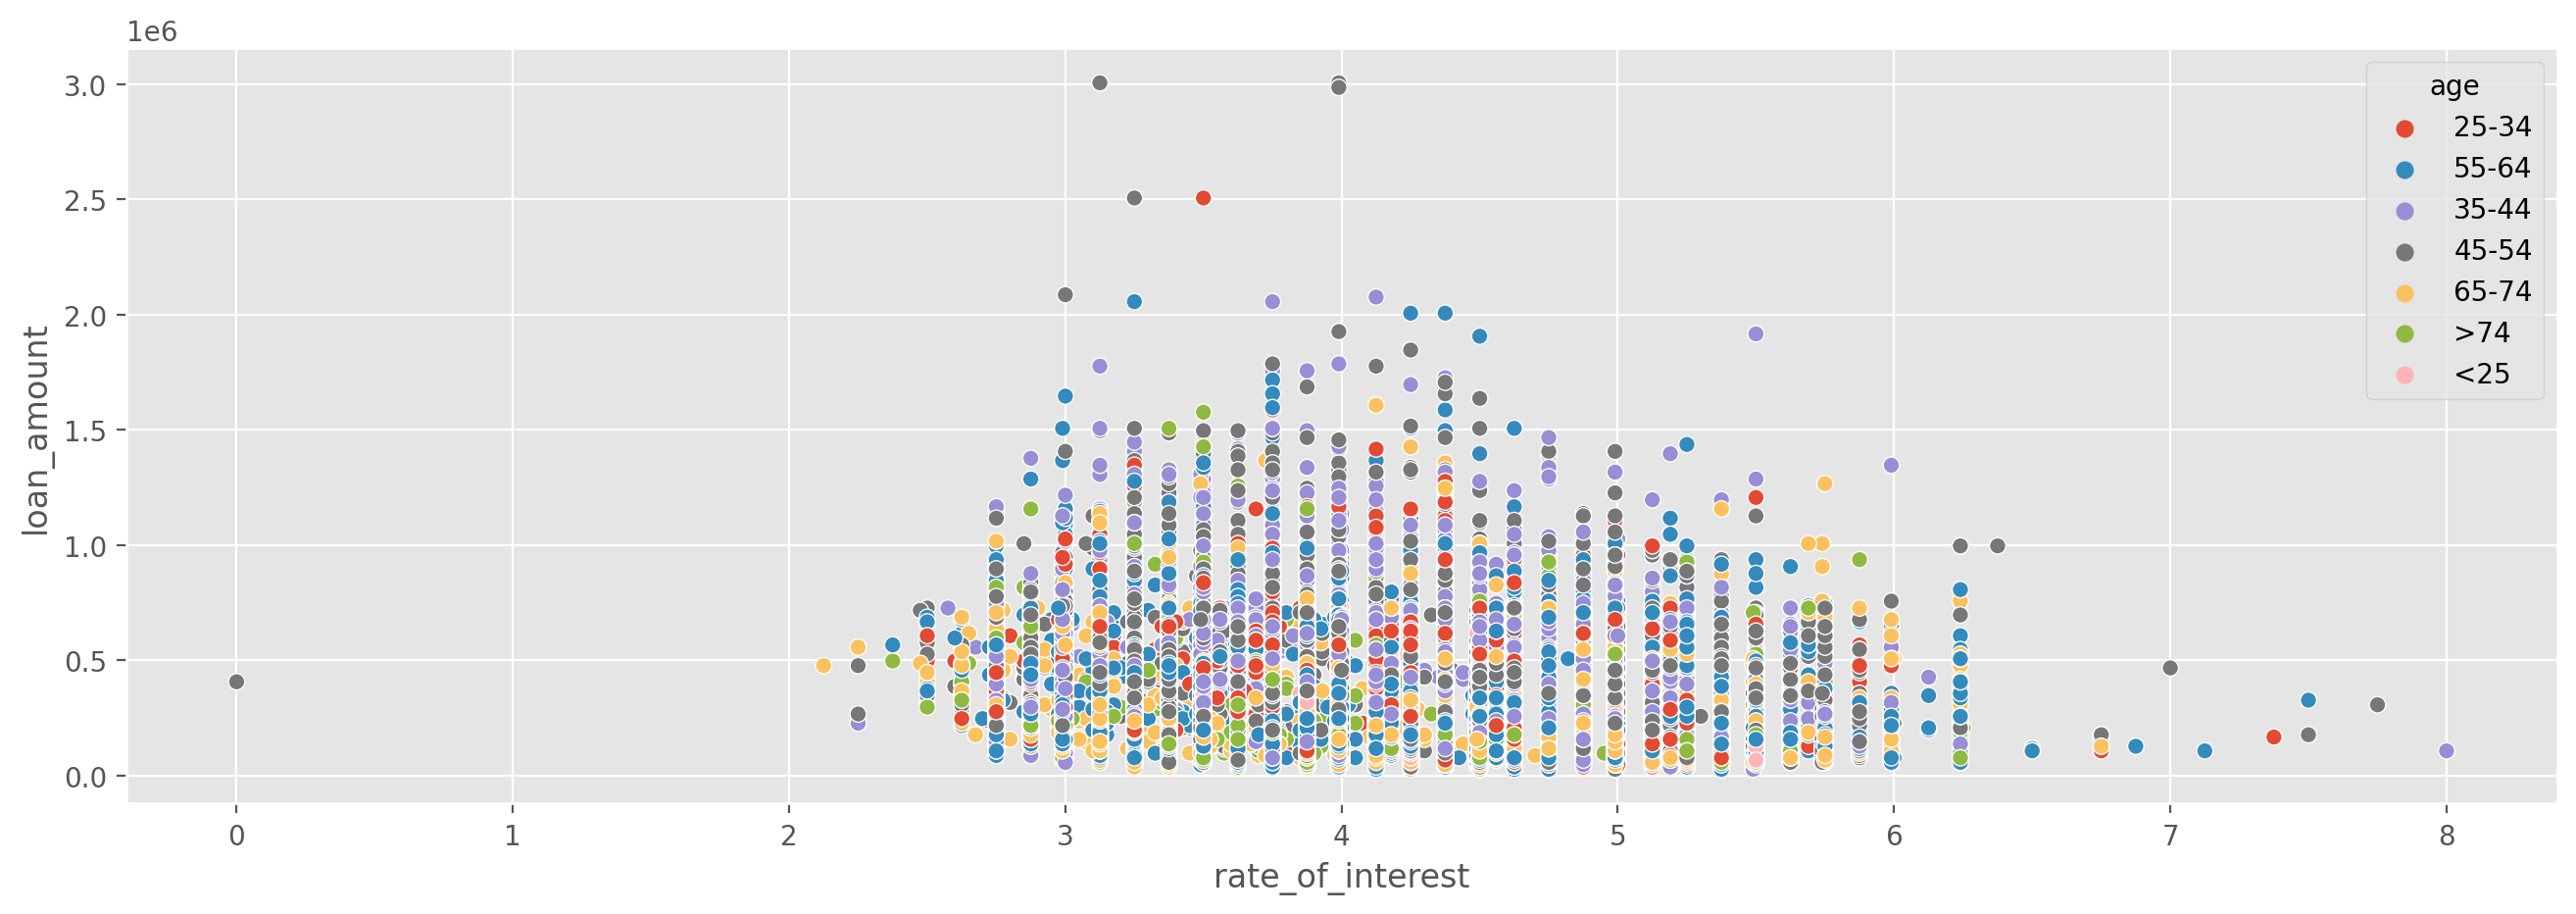

In [13]:
plt.figure(figsize = (16,5), dpi = 200)
sns.scatterplot(x='rate_of_interest',y='loan_amount',hue='age',data = data) #high loan amount pay high interest rate

<Axes: xlabel='loan_type', ylabel='income'>

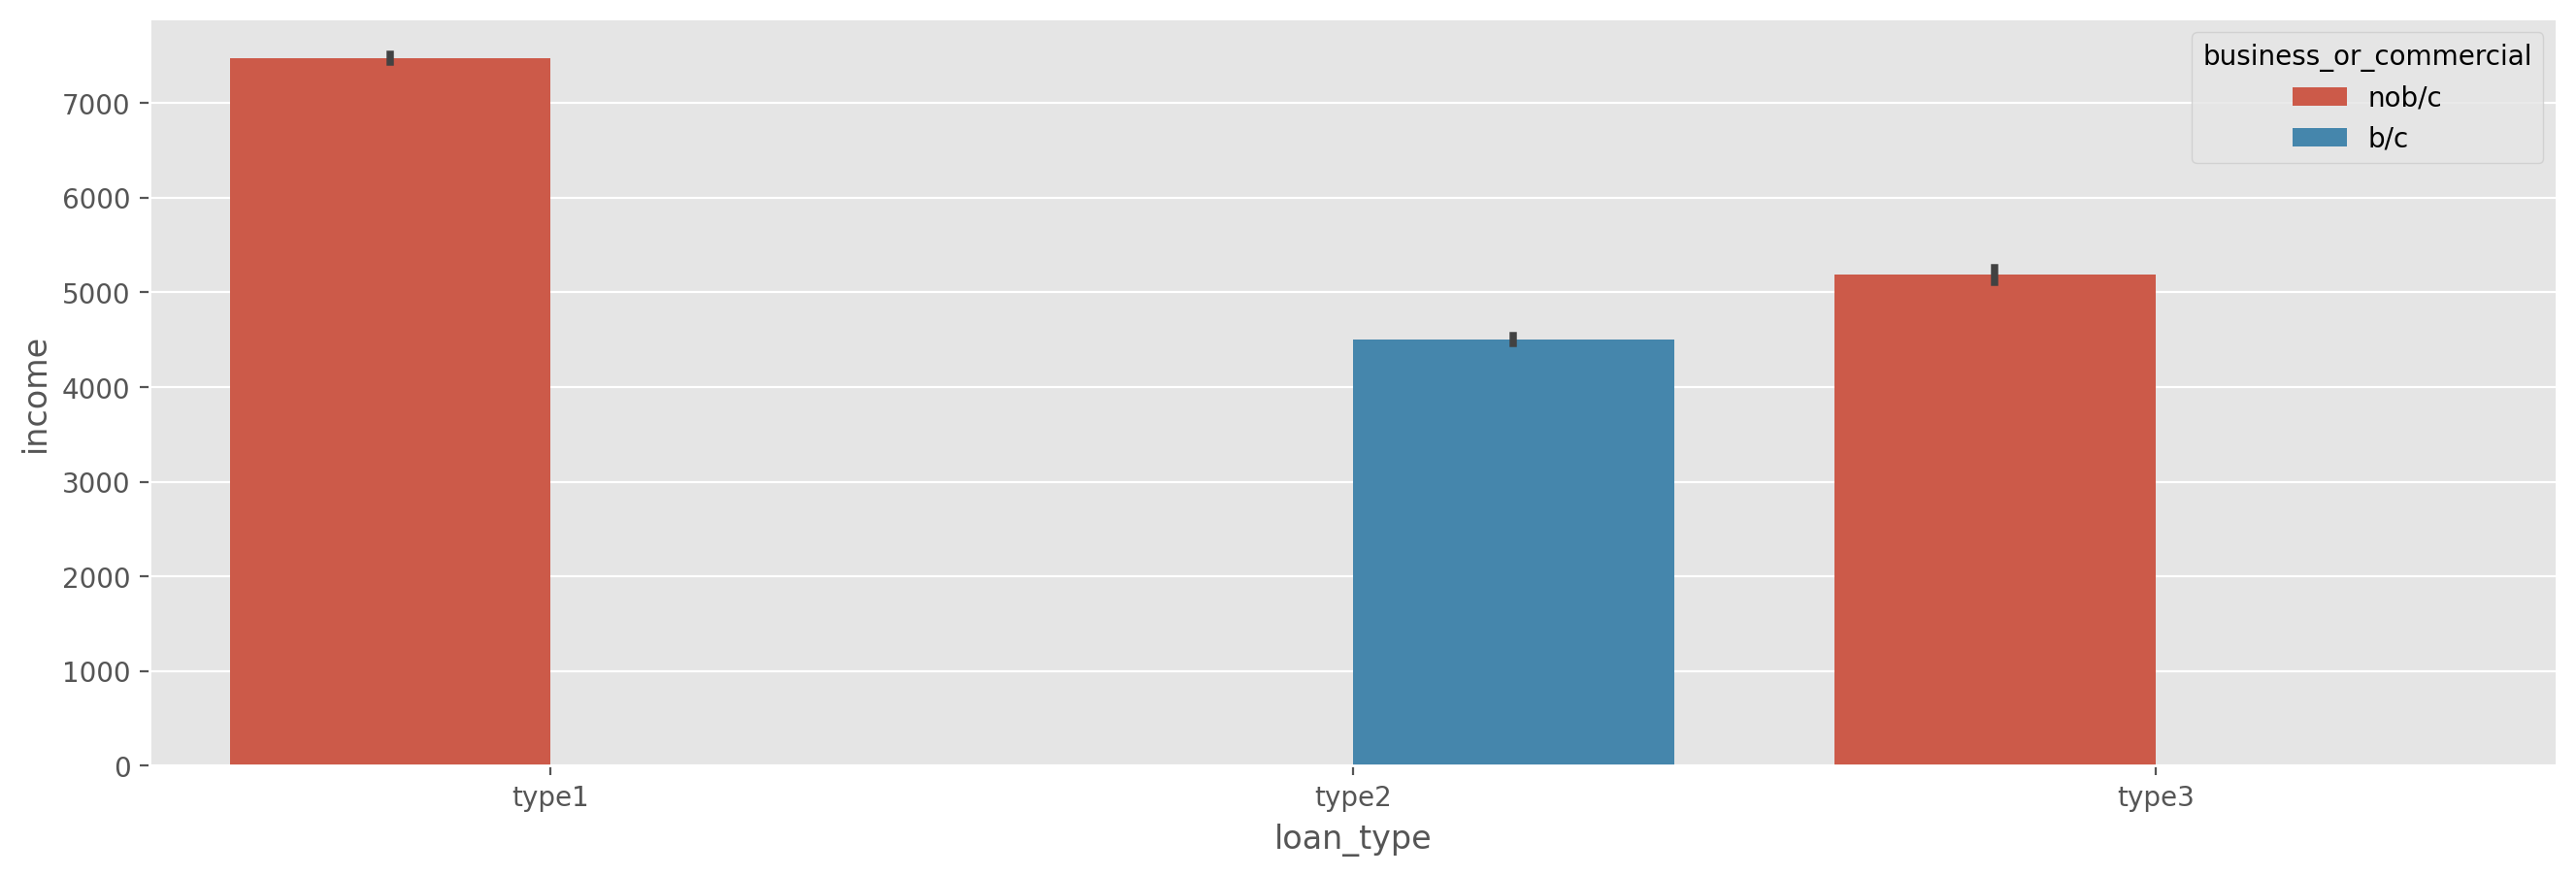

In [14]:
plt.figure(figsize = (16,5), dpi = 200)
sns.barplot(x='loan_type',y='income',hue='business_or_commercial',data = data) #type 1 get hugh income but its not commercial

<Axes: xlabel='loan_type', ylabel='count'>

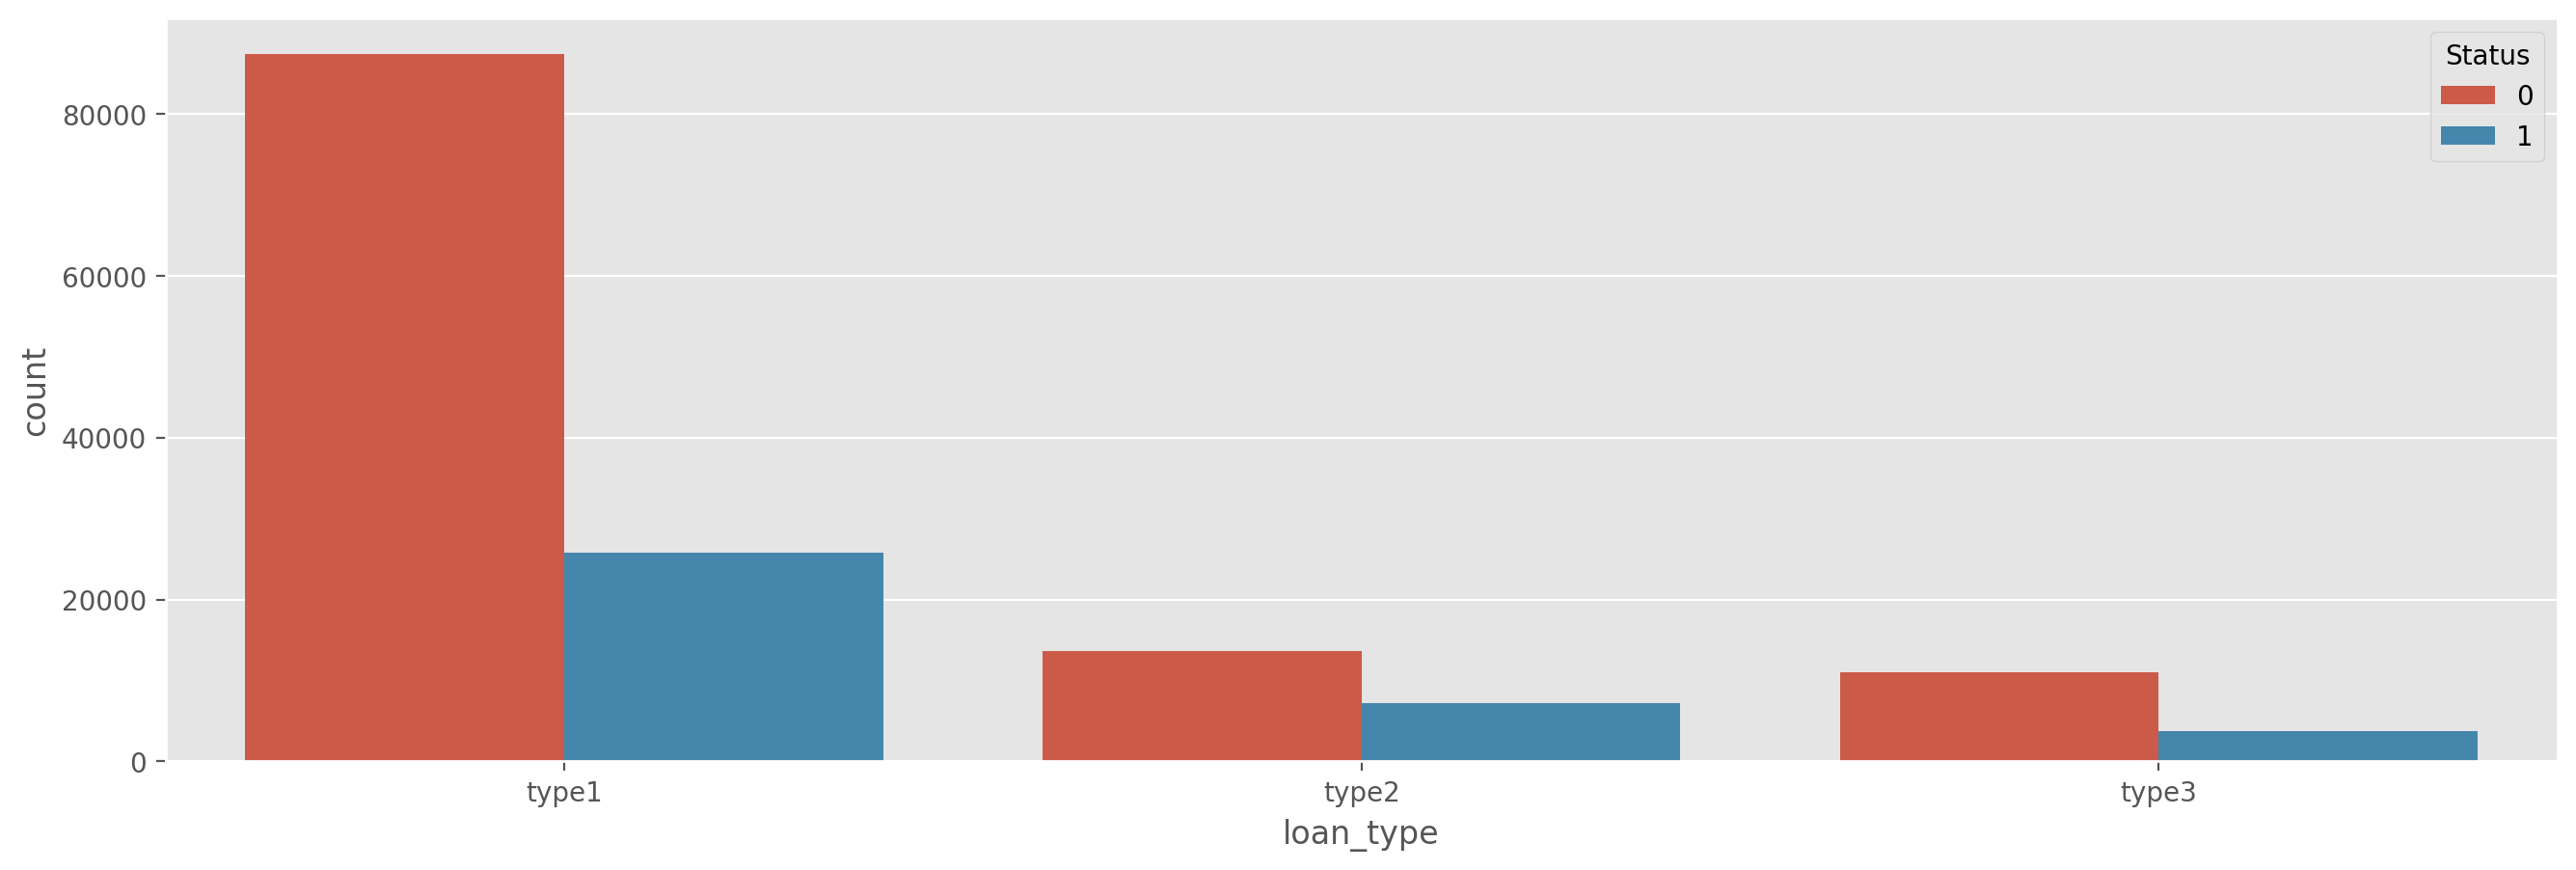

In [15]:
plt.figure(figsize = (16,5), dpi = 200)
sns.countplot(x='loan_type',hue='Status',data = data)#type1 loan type is more

<Axes: xlabel='loan_type', ylabel='count'>

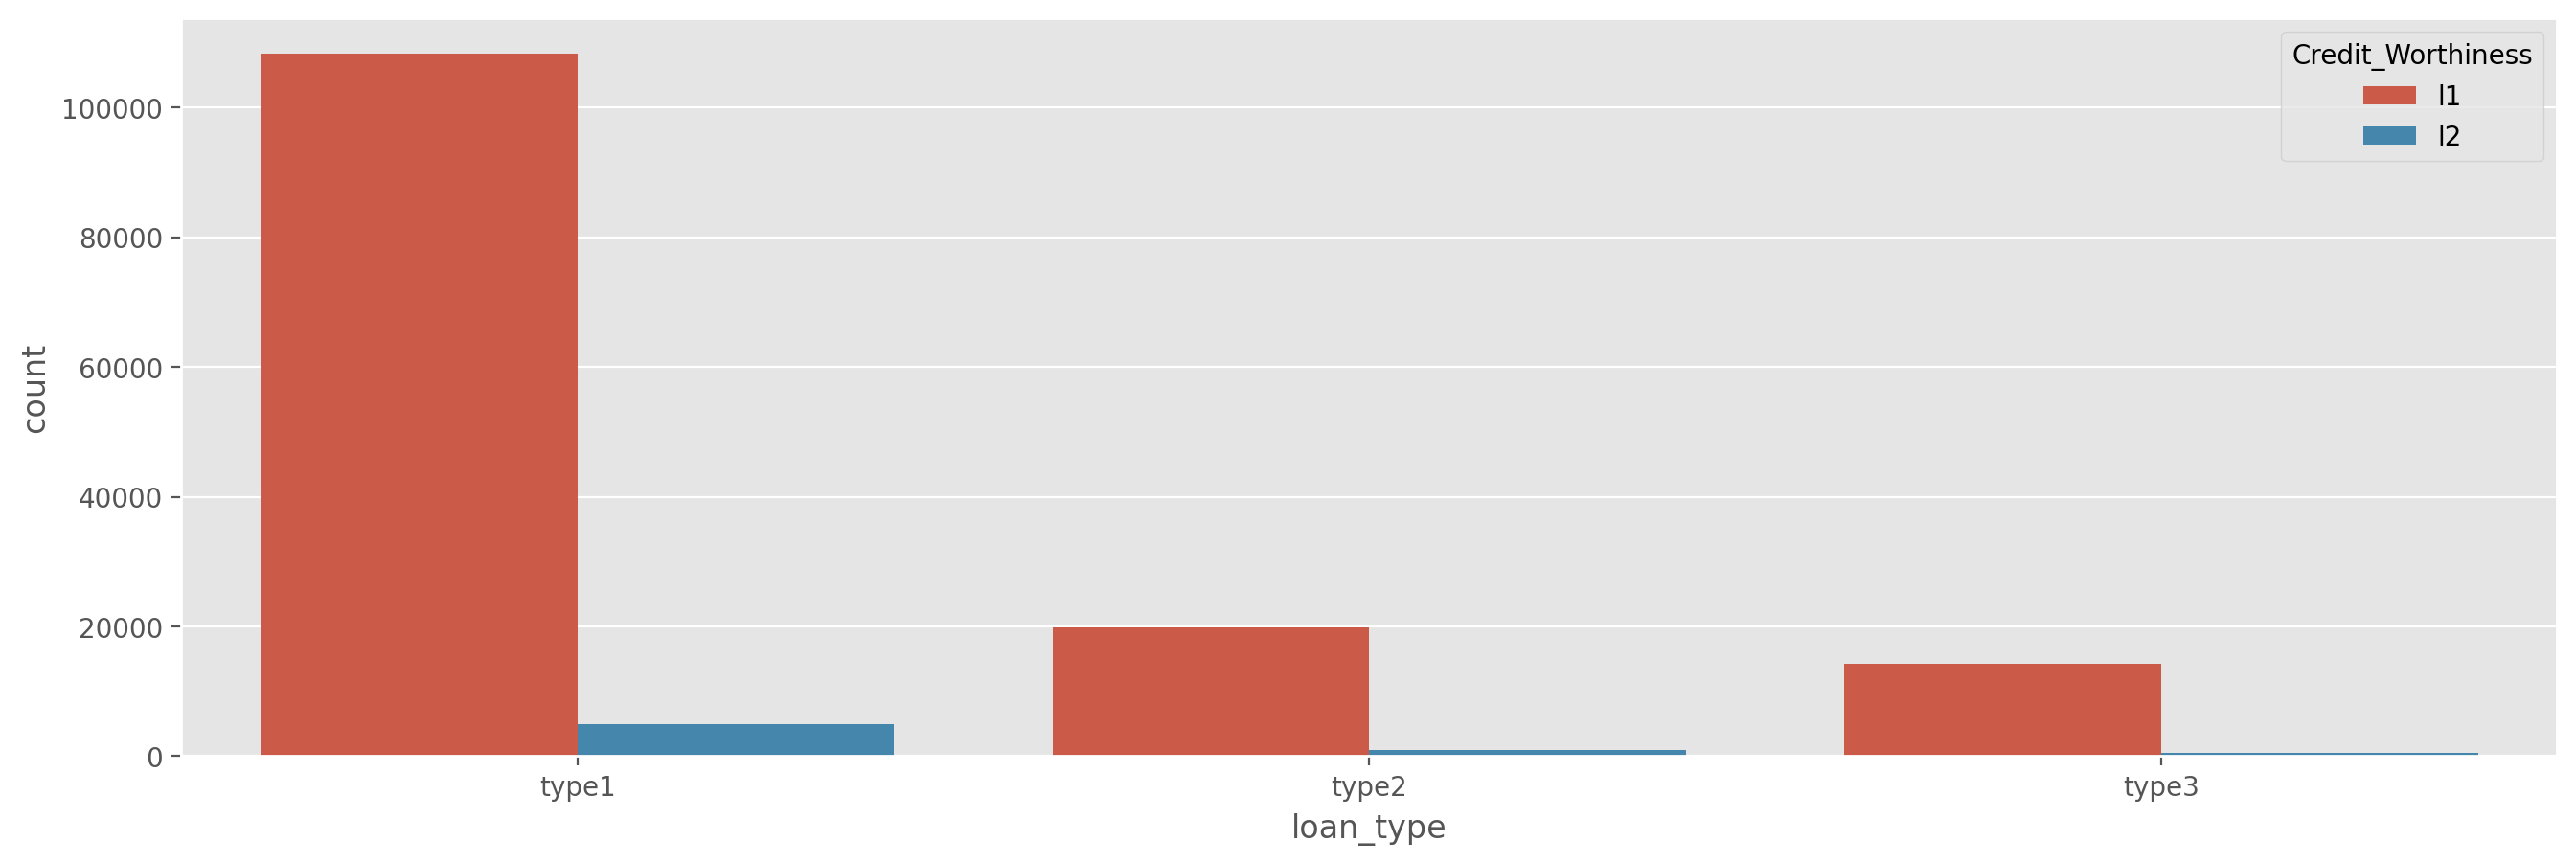

In [16]:
plt.figure(figsize = (16,5), dpi = 200)
sns.countplot(x='loan_type',hue='Credit_Worthiness',data = data) #type1 with high credit rate l1 is more

<Axes: xlabel='loan_type', ylabel='count'>

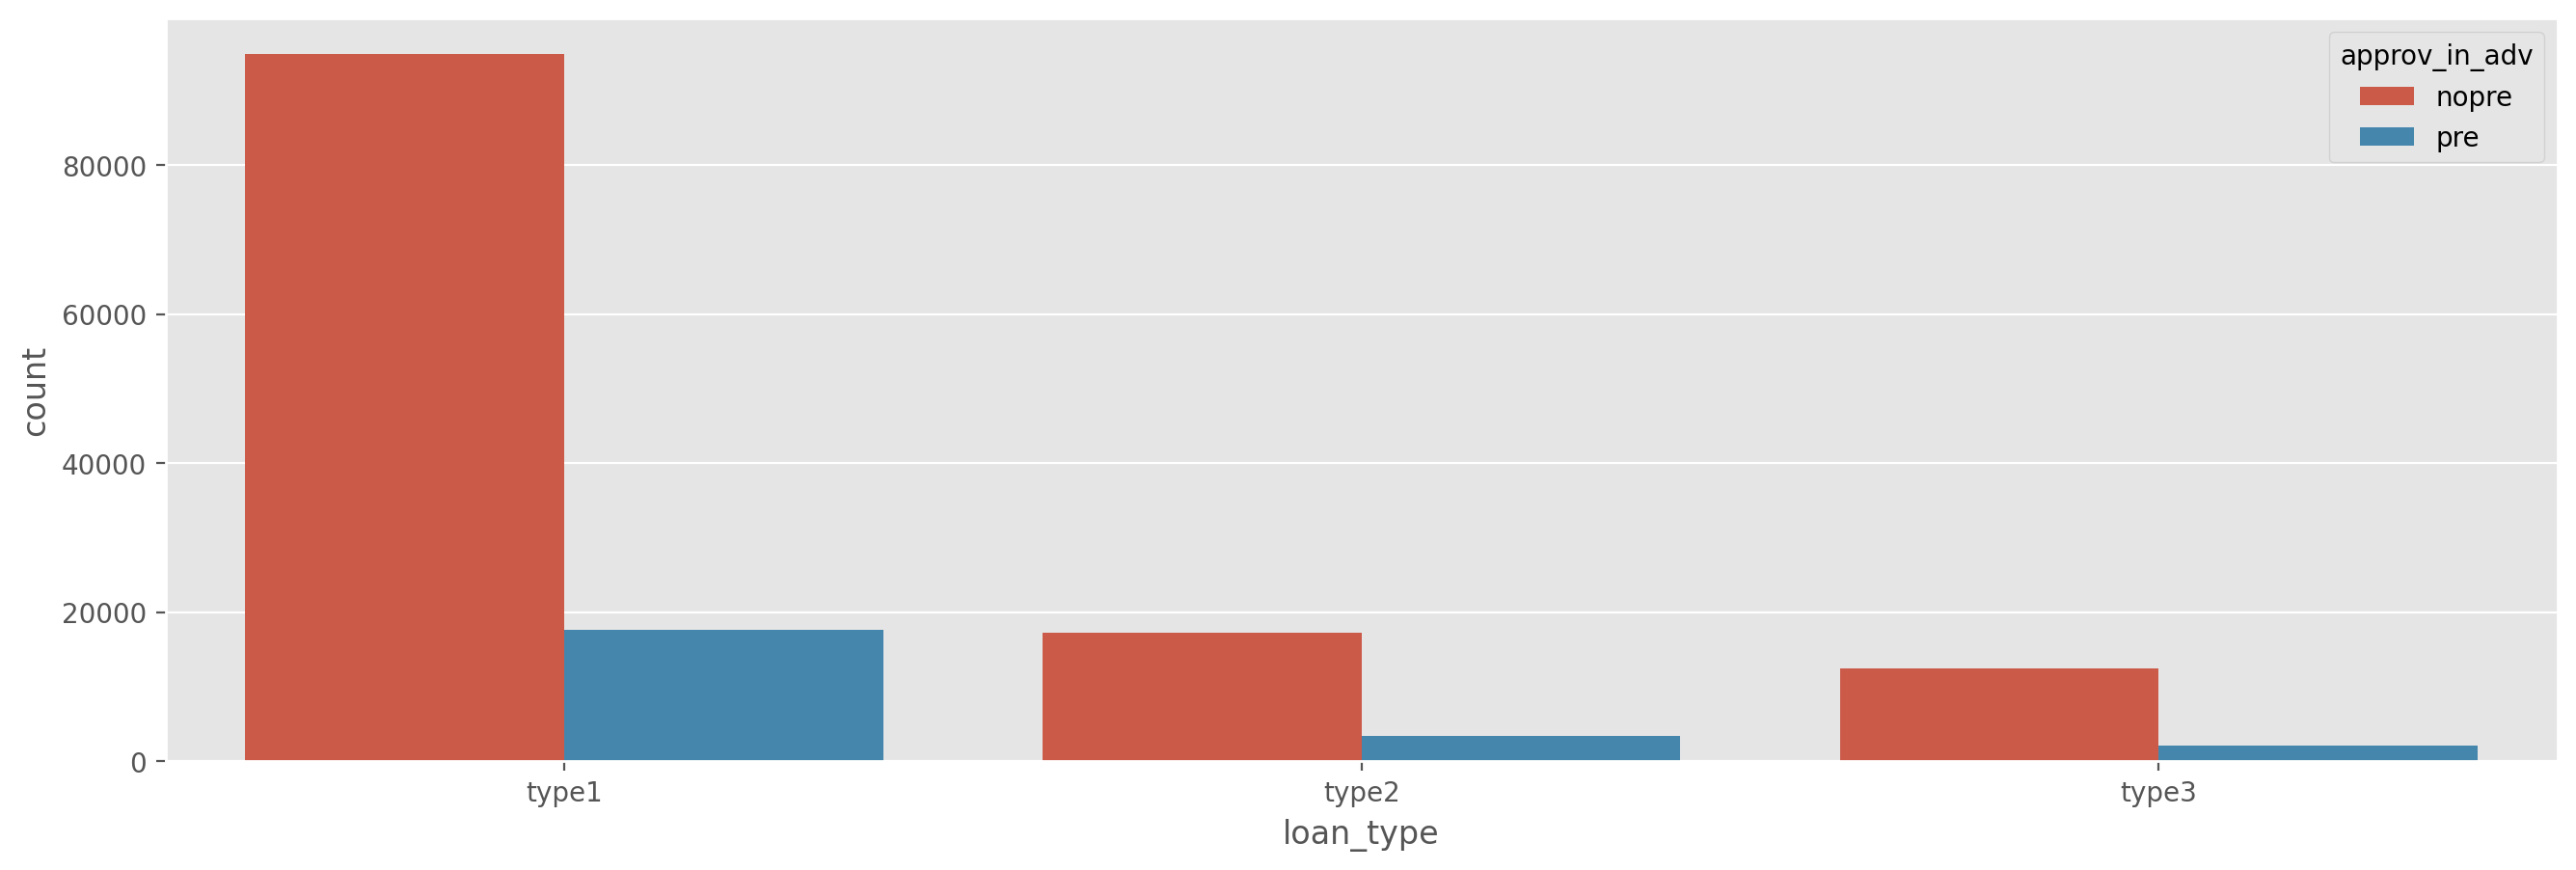

In [17]:
plt.figure(figsize = (16,5), dpi = 200)
sns.countplot(x='loan_type',hue='approv_in_adv',data = data) #most loan type not approve in advance

<Axes: xlabel='loan_limit', ylabel='Status'>

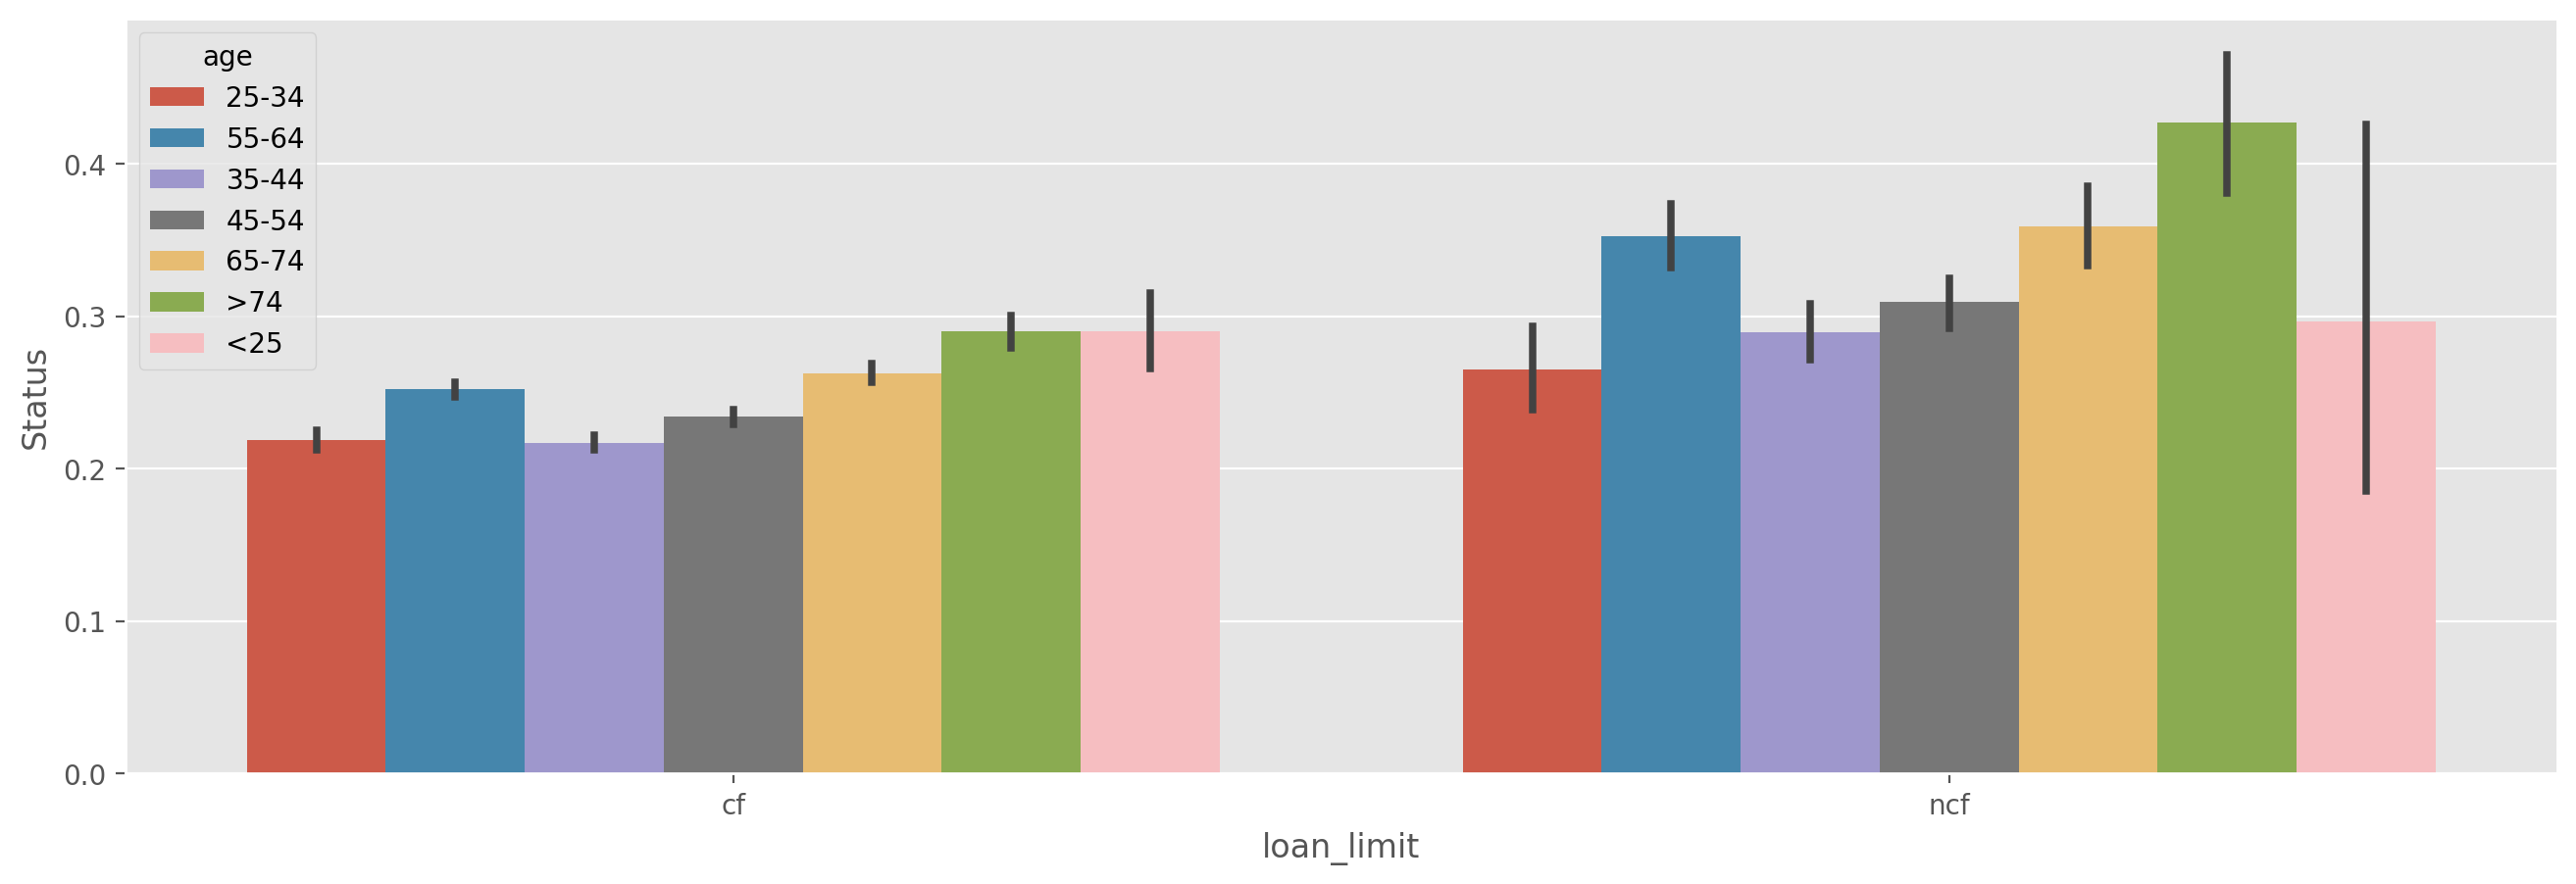

In [18]:
plt.figure(figsize = (16,5), dpi = 200)
sns.barplot(x='loan_limit',y='Status',hue='age',data = data) #loan limited for age people 

<Axes: xlabel='approv_in_adv', ylabel='count'>

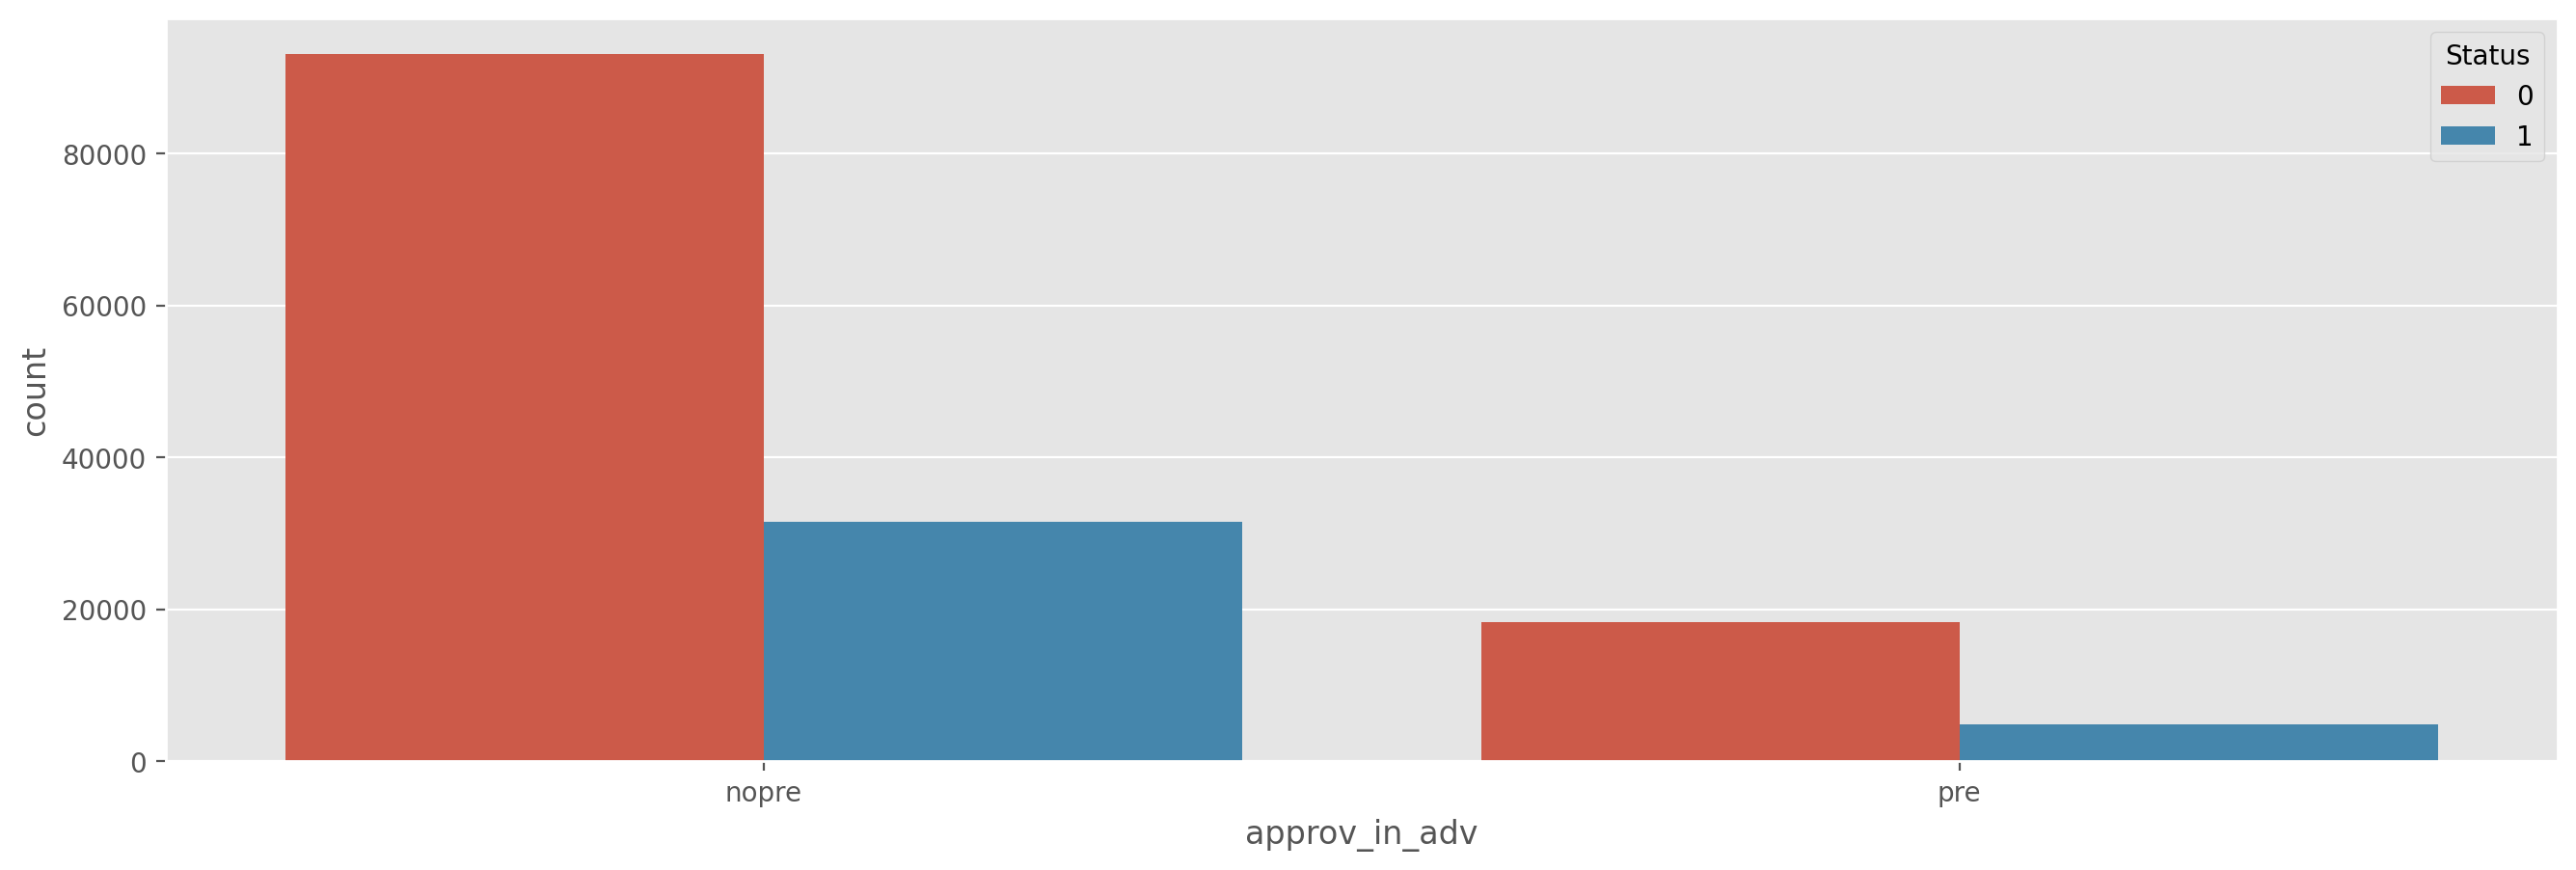

In [19]:
plt.figure(figsize = (16,5), dpi = 200)
sns.countplot(x='approv_in_adv',hue='Status',data = data) #most loan not approve in advance

<Axes: xlabel='Status', ylabel='count'>

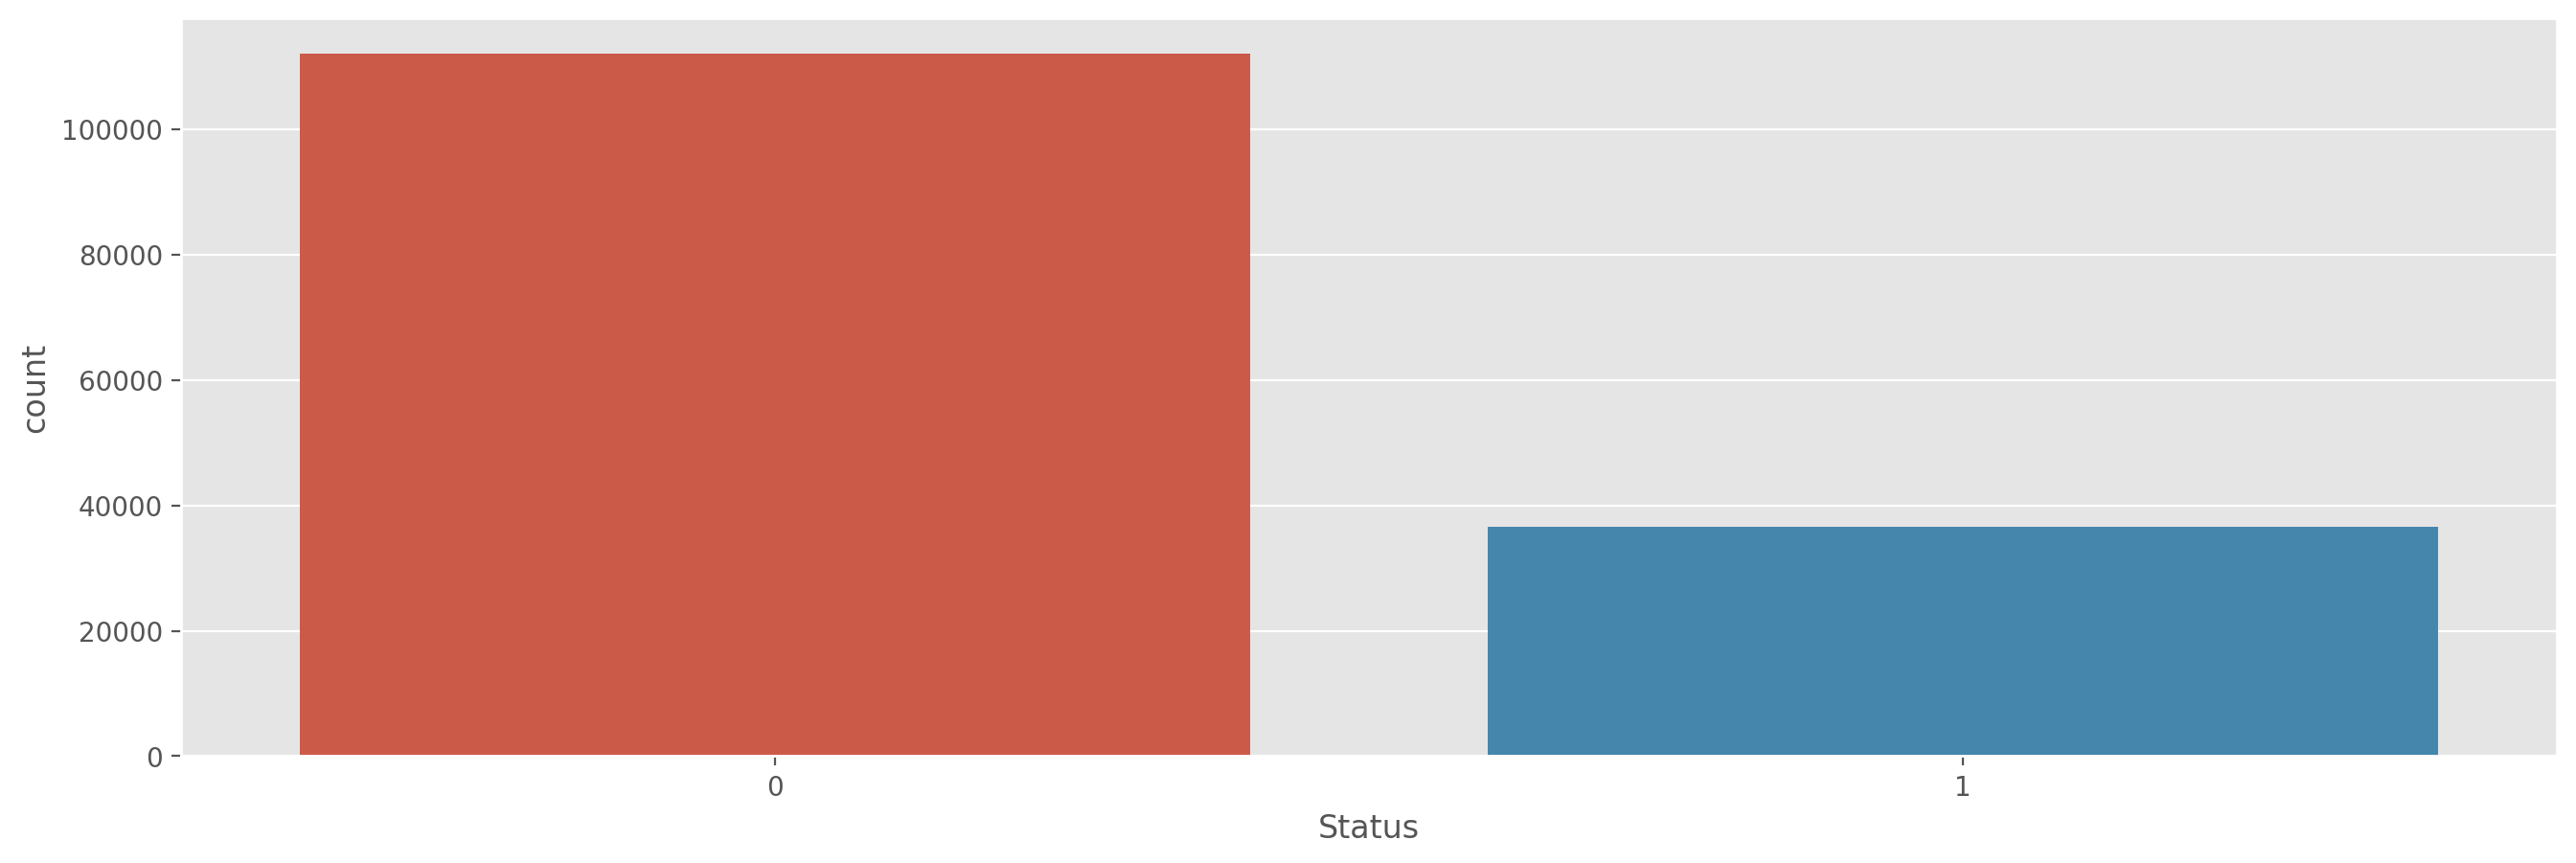

In [20]:
plt.figure(figsize = (16,5), dpi = 200)
sns.countplot(x='Status',data = data)  #0 status count ismore

<Axes: xlabel='Region', ylabel='income'>

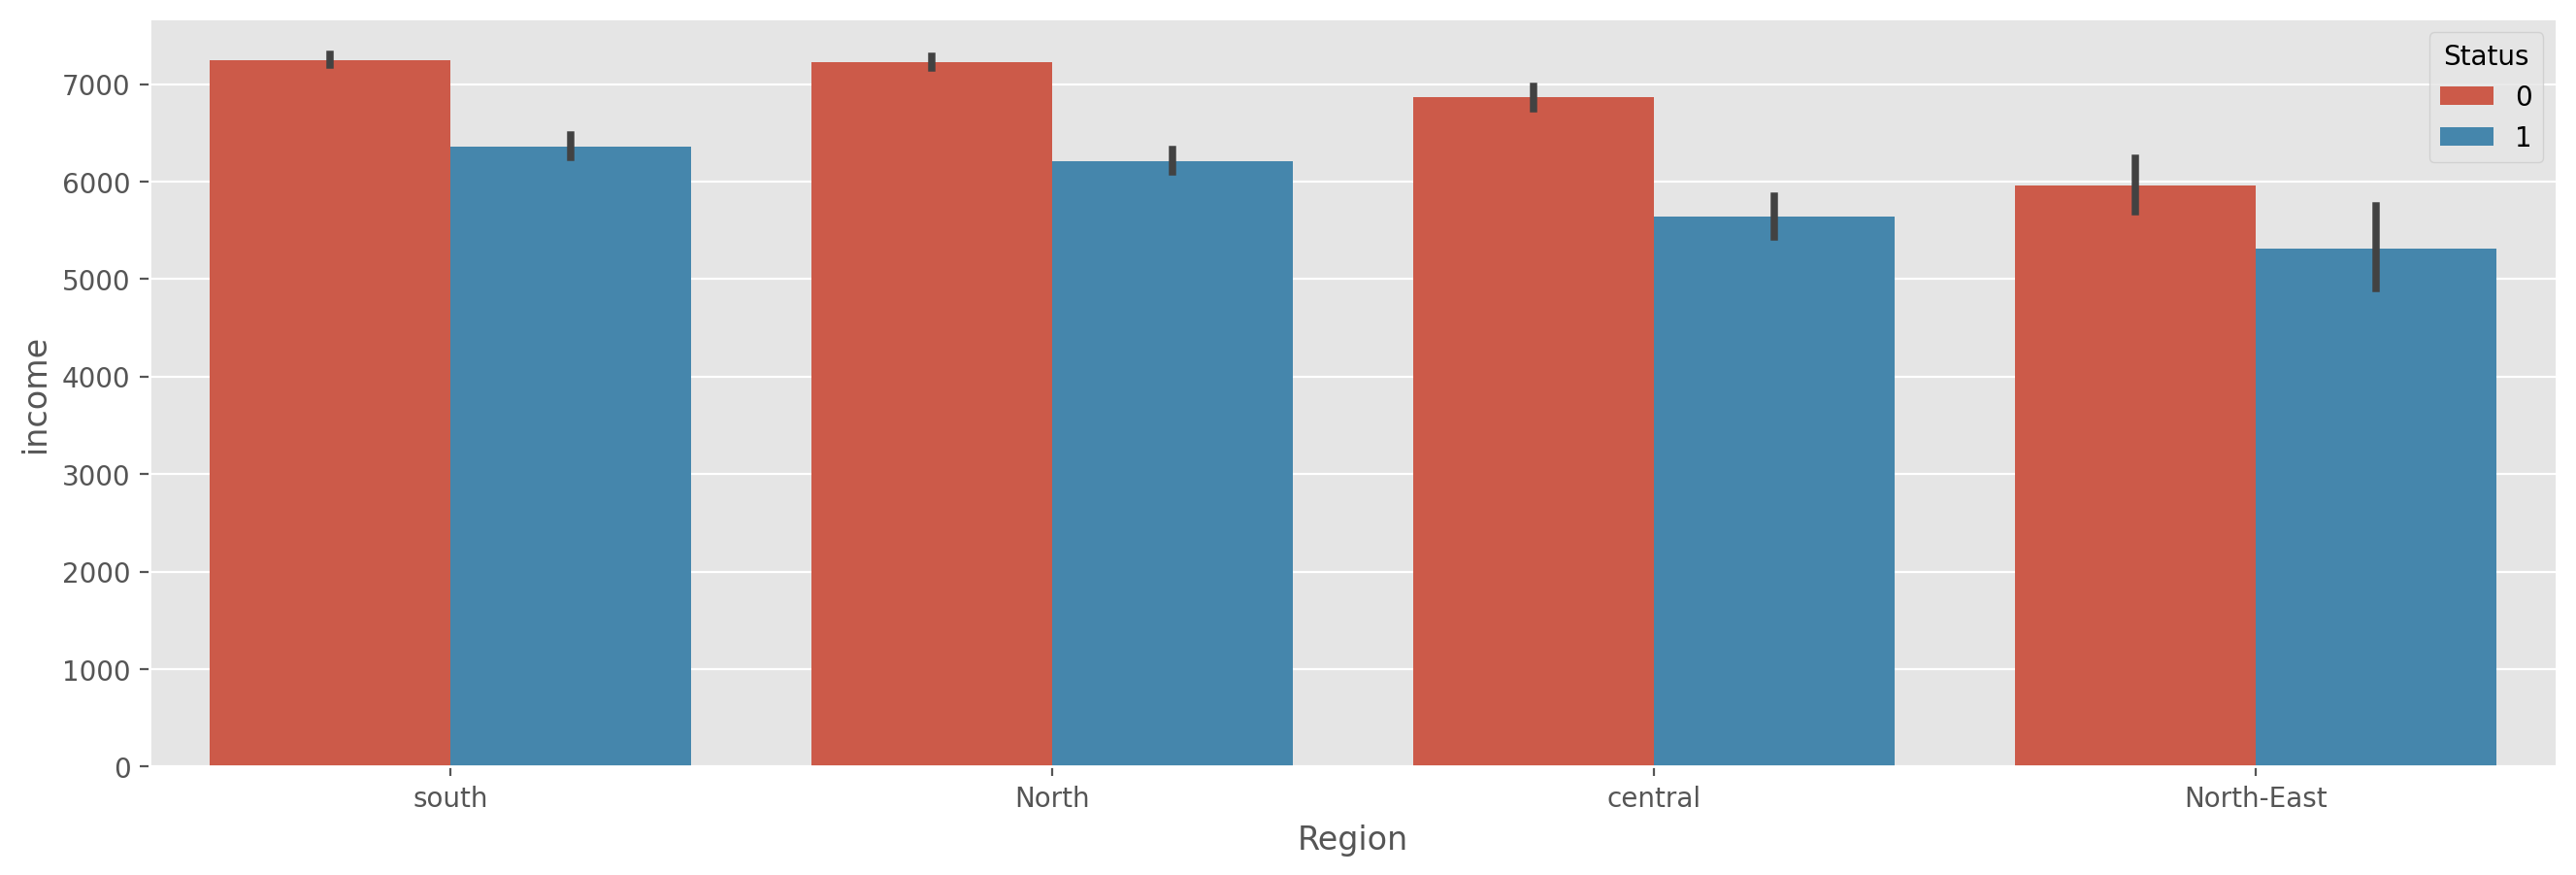

In [21]:
plt.figure(figsize = (16,5), dpi = 200)
sns.barplot(x='Region',y='income',hue='Status',data = data) #north and south region income is high with their status also

<Axes: xlabel='Region', ylabel='count'>

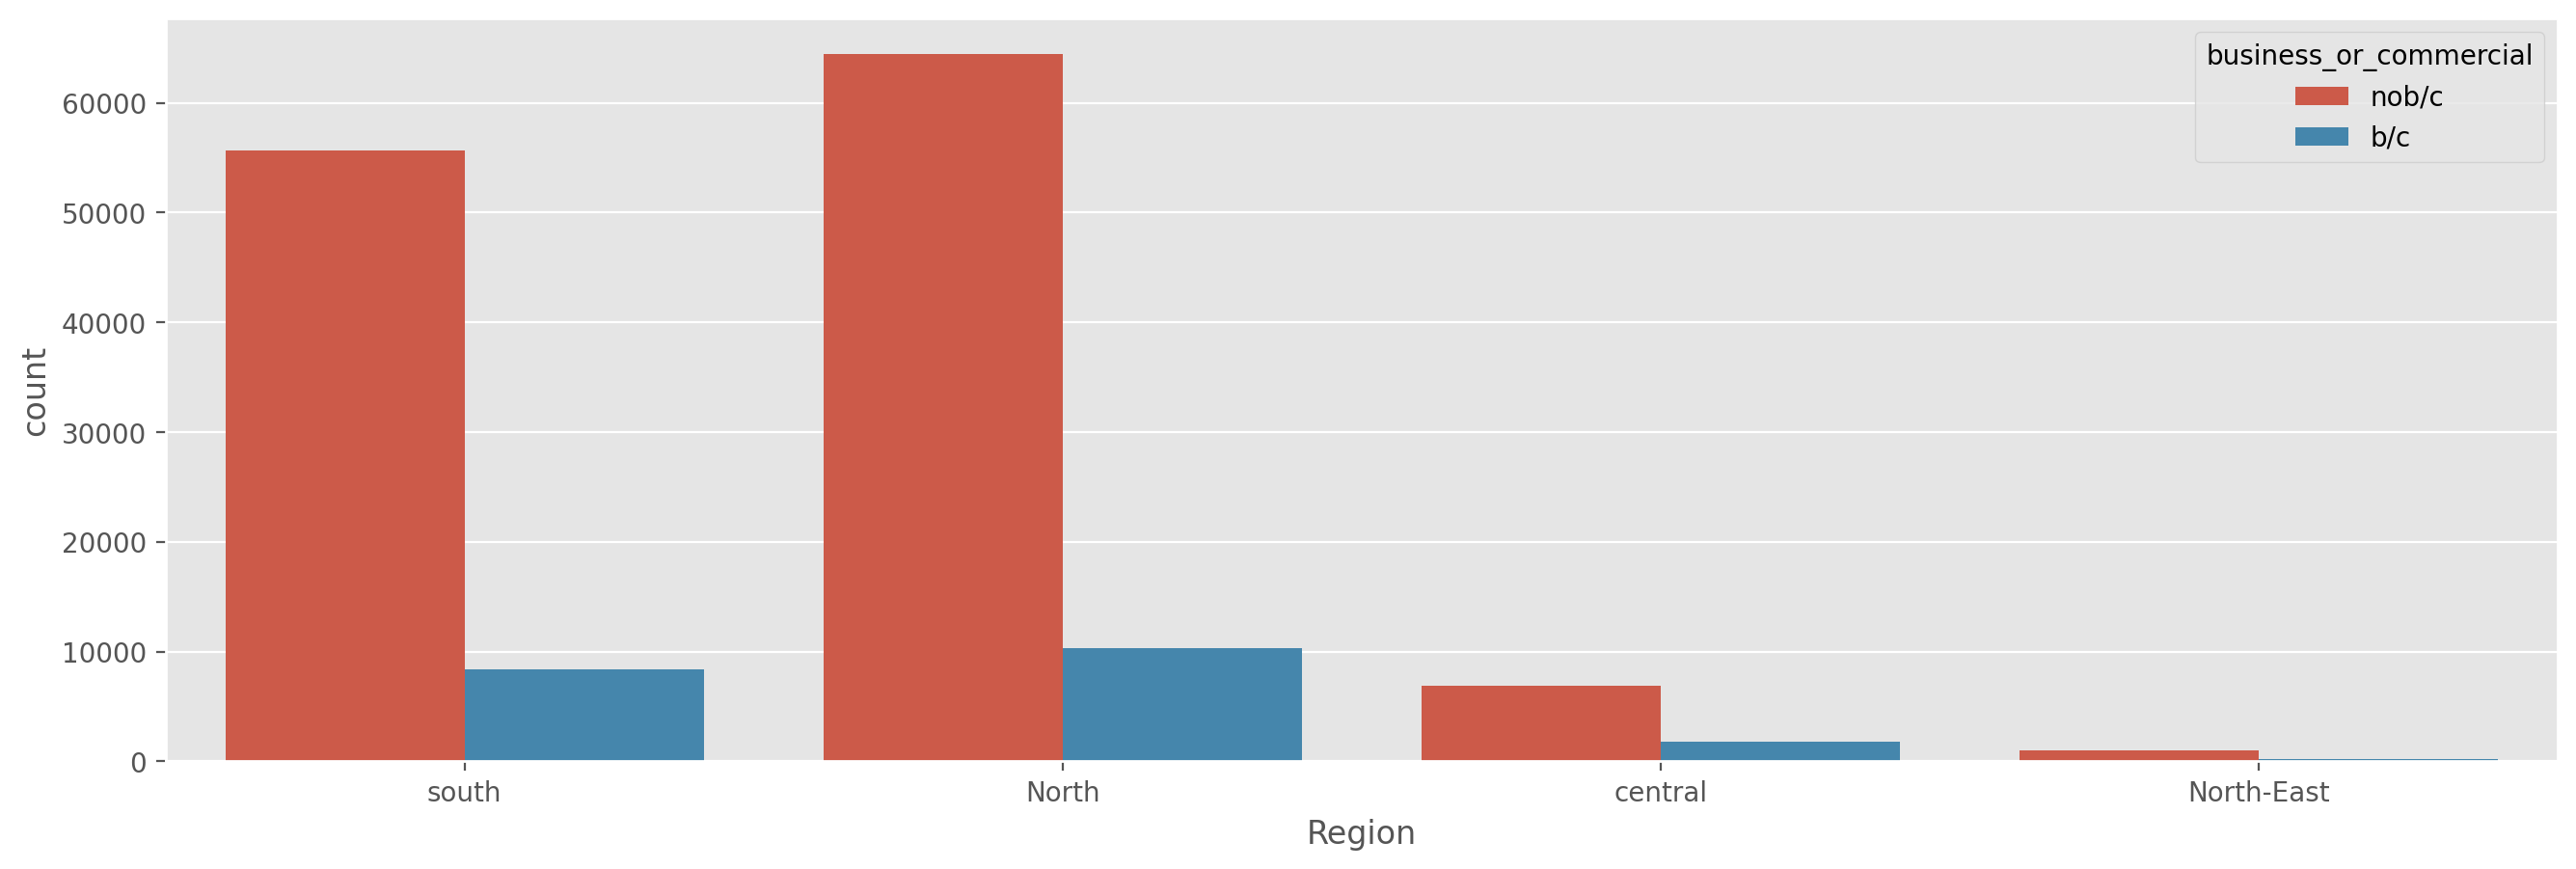

In [22]:
plt.figure(figsize = (16,5), dpi = 200)
sns.countplot(x='Region',hue='business_or_commercial',data = data) #north region is not so commercial

<Axes: xlabel='business_or_commercial', ylabel='count'>

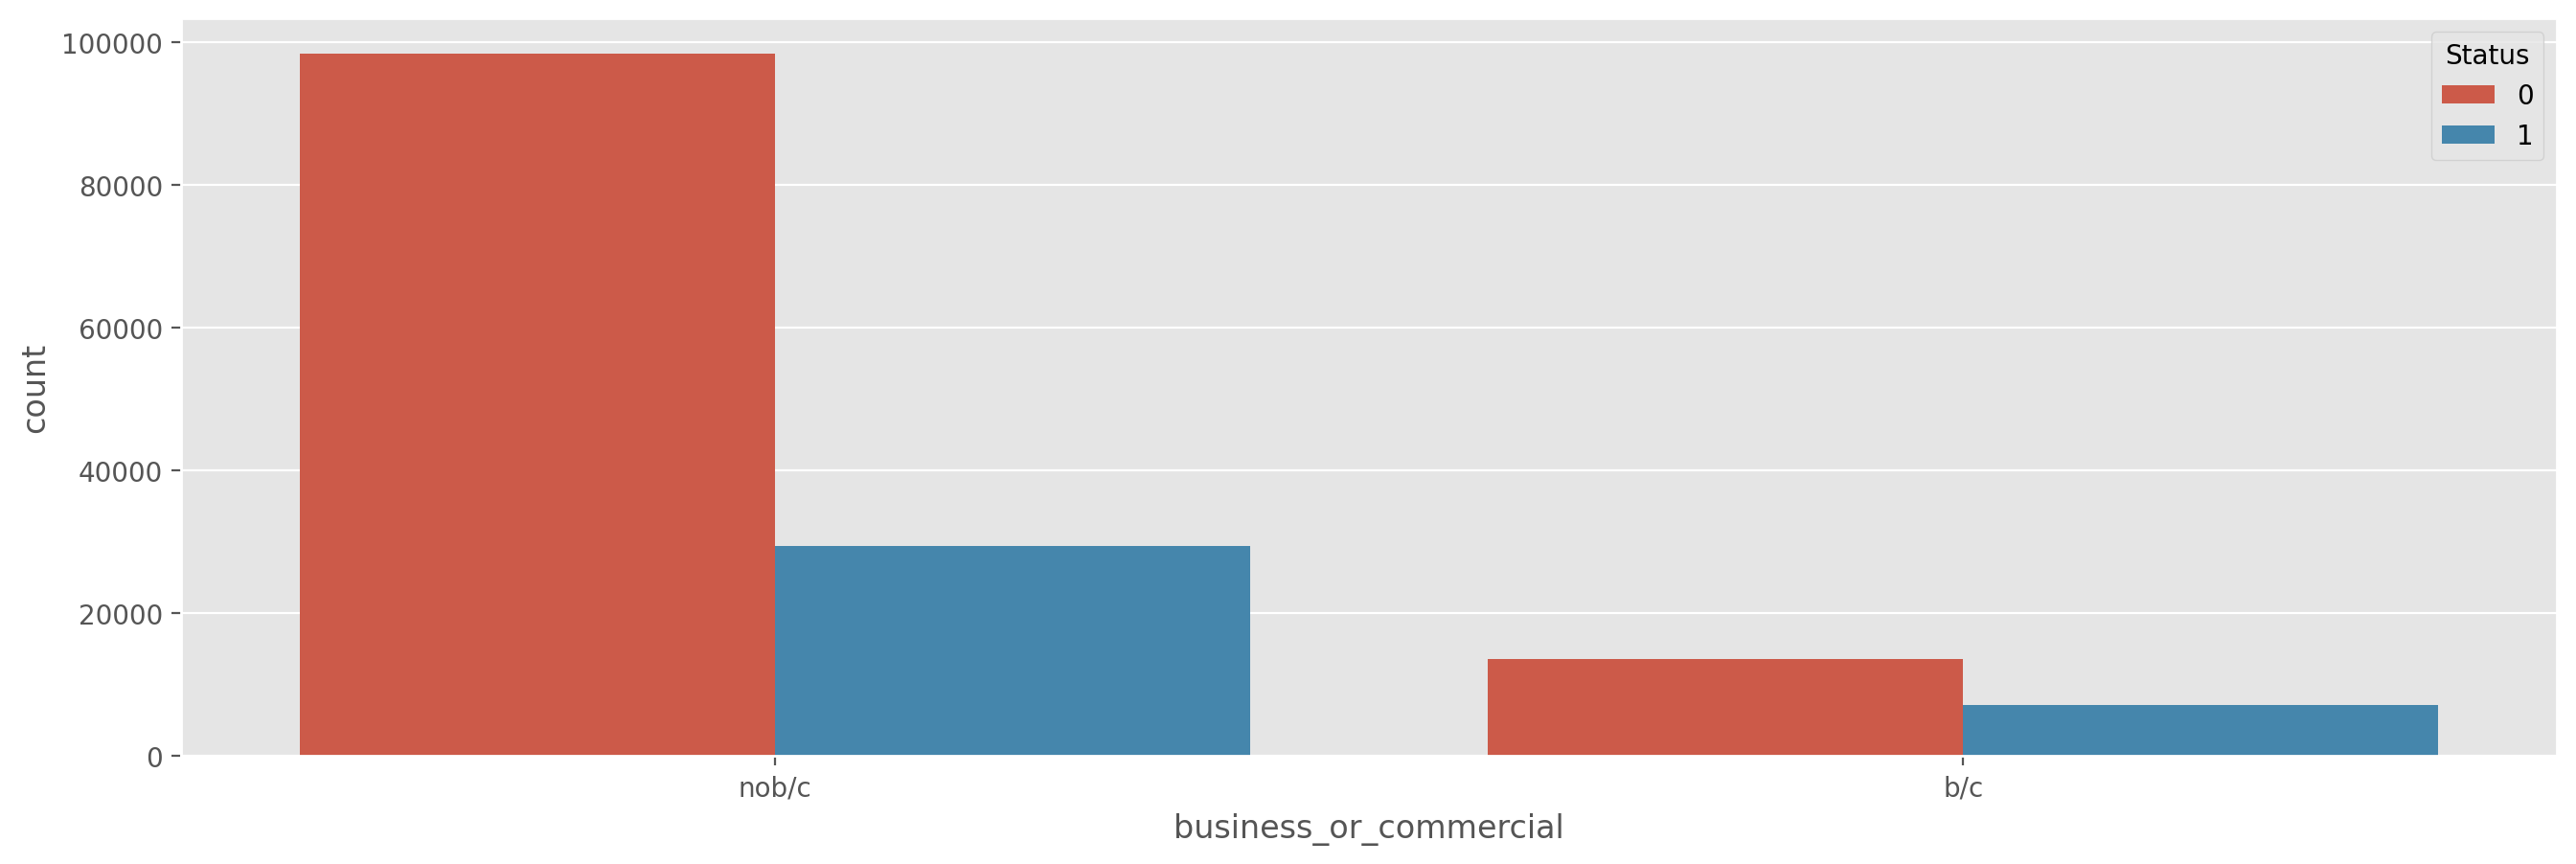

In [23]:
plt.figure(figsize = (16,5), dpi = 200)
sns.countplot(x='business_or_commercial',hue='Status',data = data) #no b/c status is high

<Axes: xlabel='loan_limit', ylabel='count'>

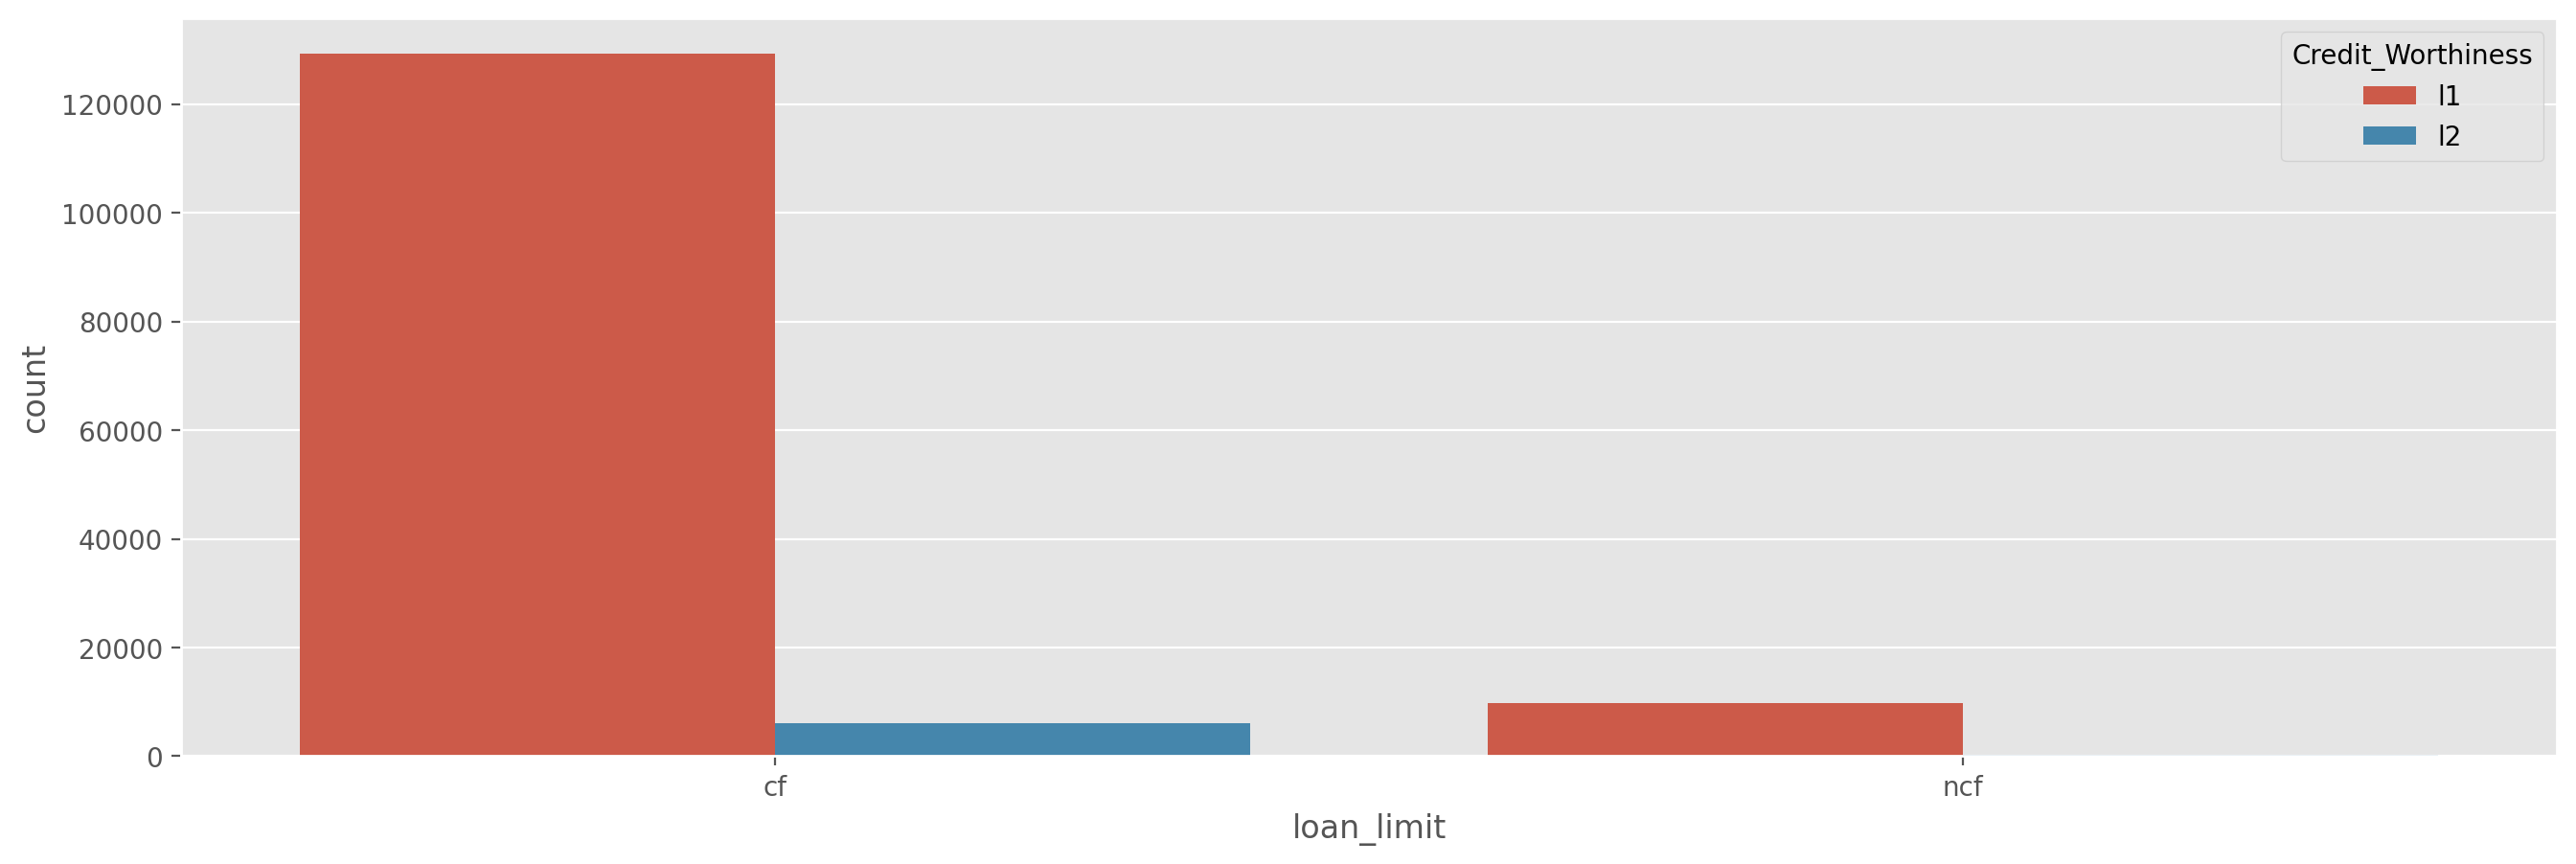

In [24]:
plt.figure(figsize = (16,5), dpi = 200)
sns.countplot(x='loan_limit',hue='Credit_Worthiness',data = data) #credit worthiness l1 with loan limit cf is more

<Axes: xlabel='loan_purpose', ylabel='count'>

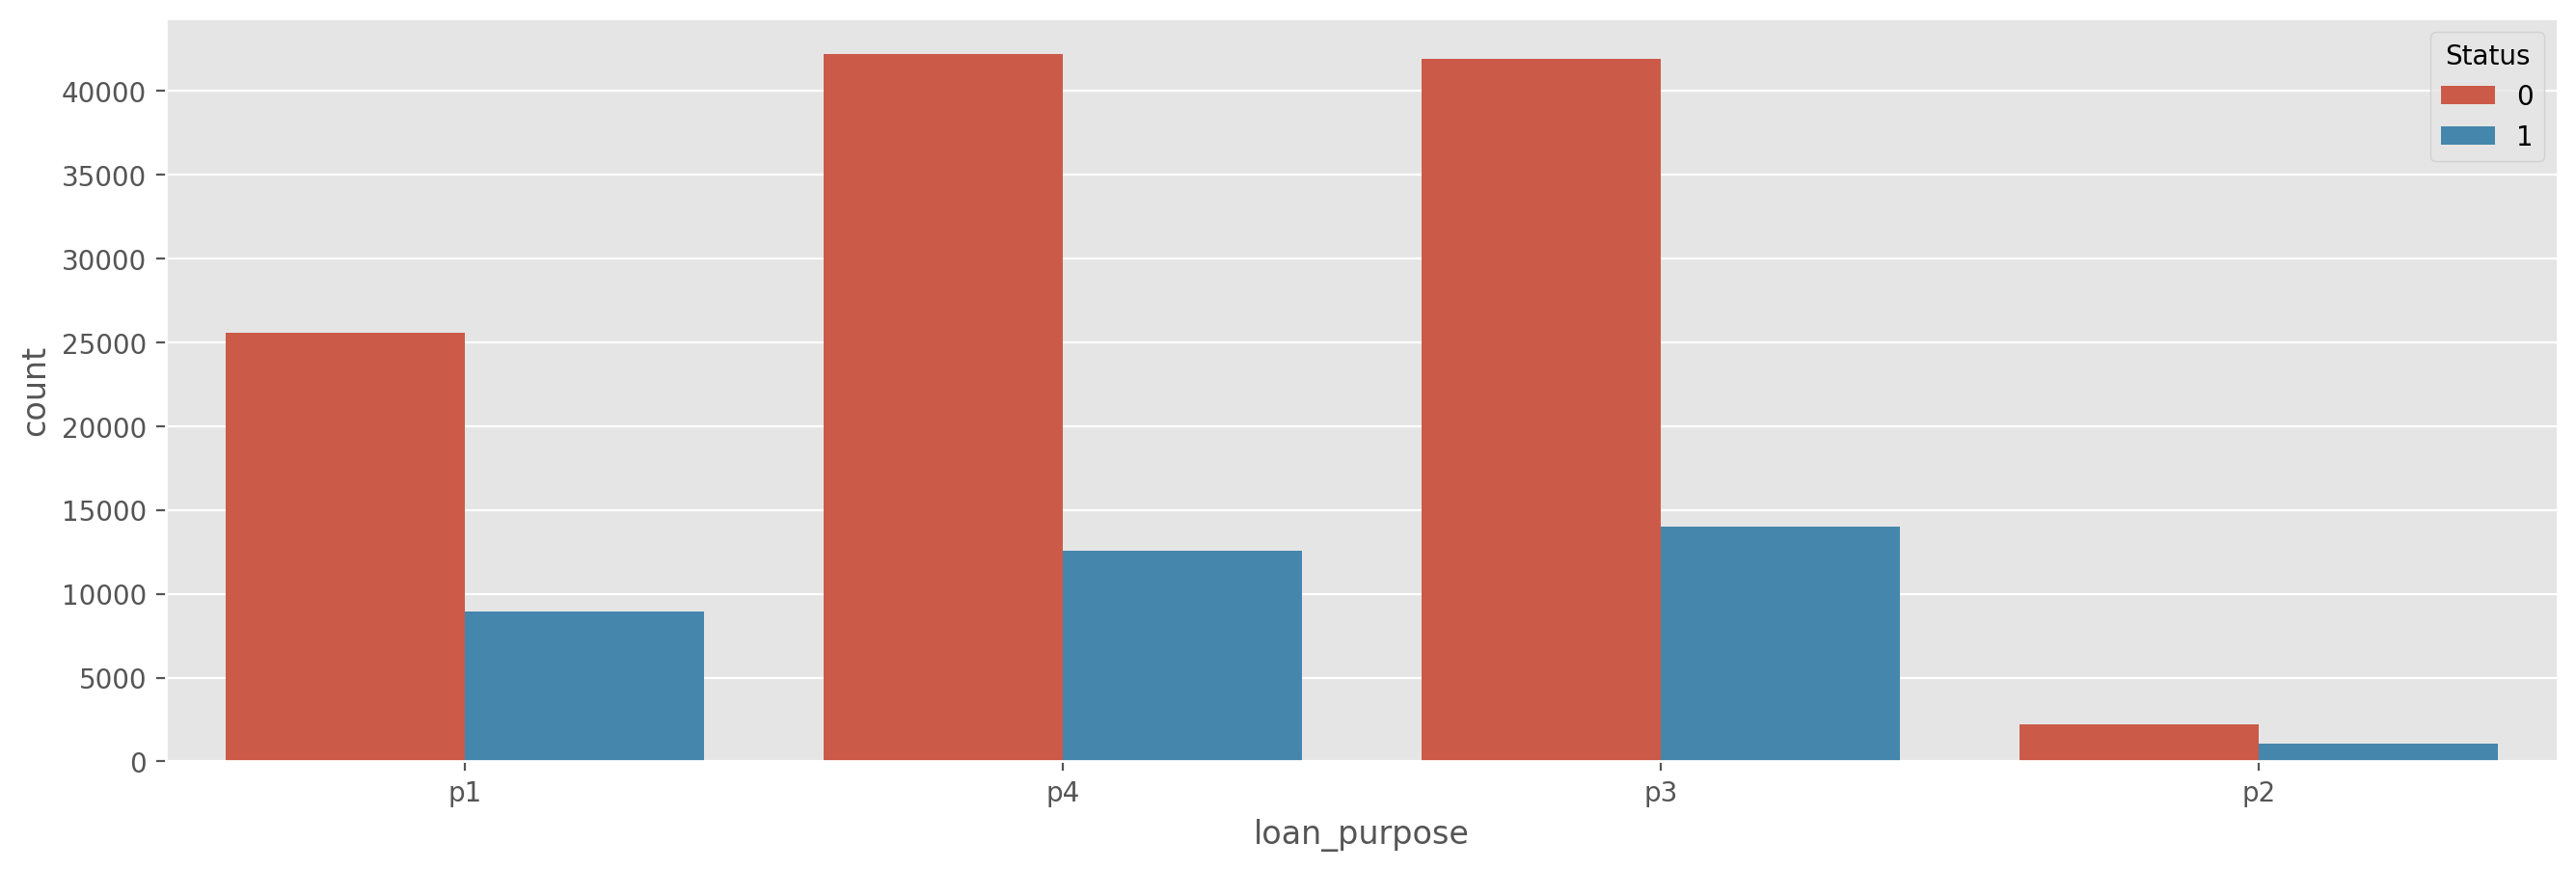

In [25]:
plt.figure(figsize = (16,5), dpi = 200)
sns.countplot(x='loan_purpose',hue='Status',data = data) #p1 and p3 purpose loan is more

<Axes: xlabel='open_credit', ylabel='count'>

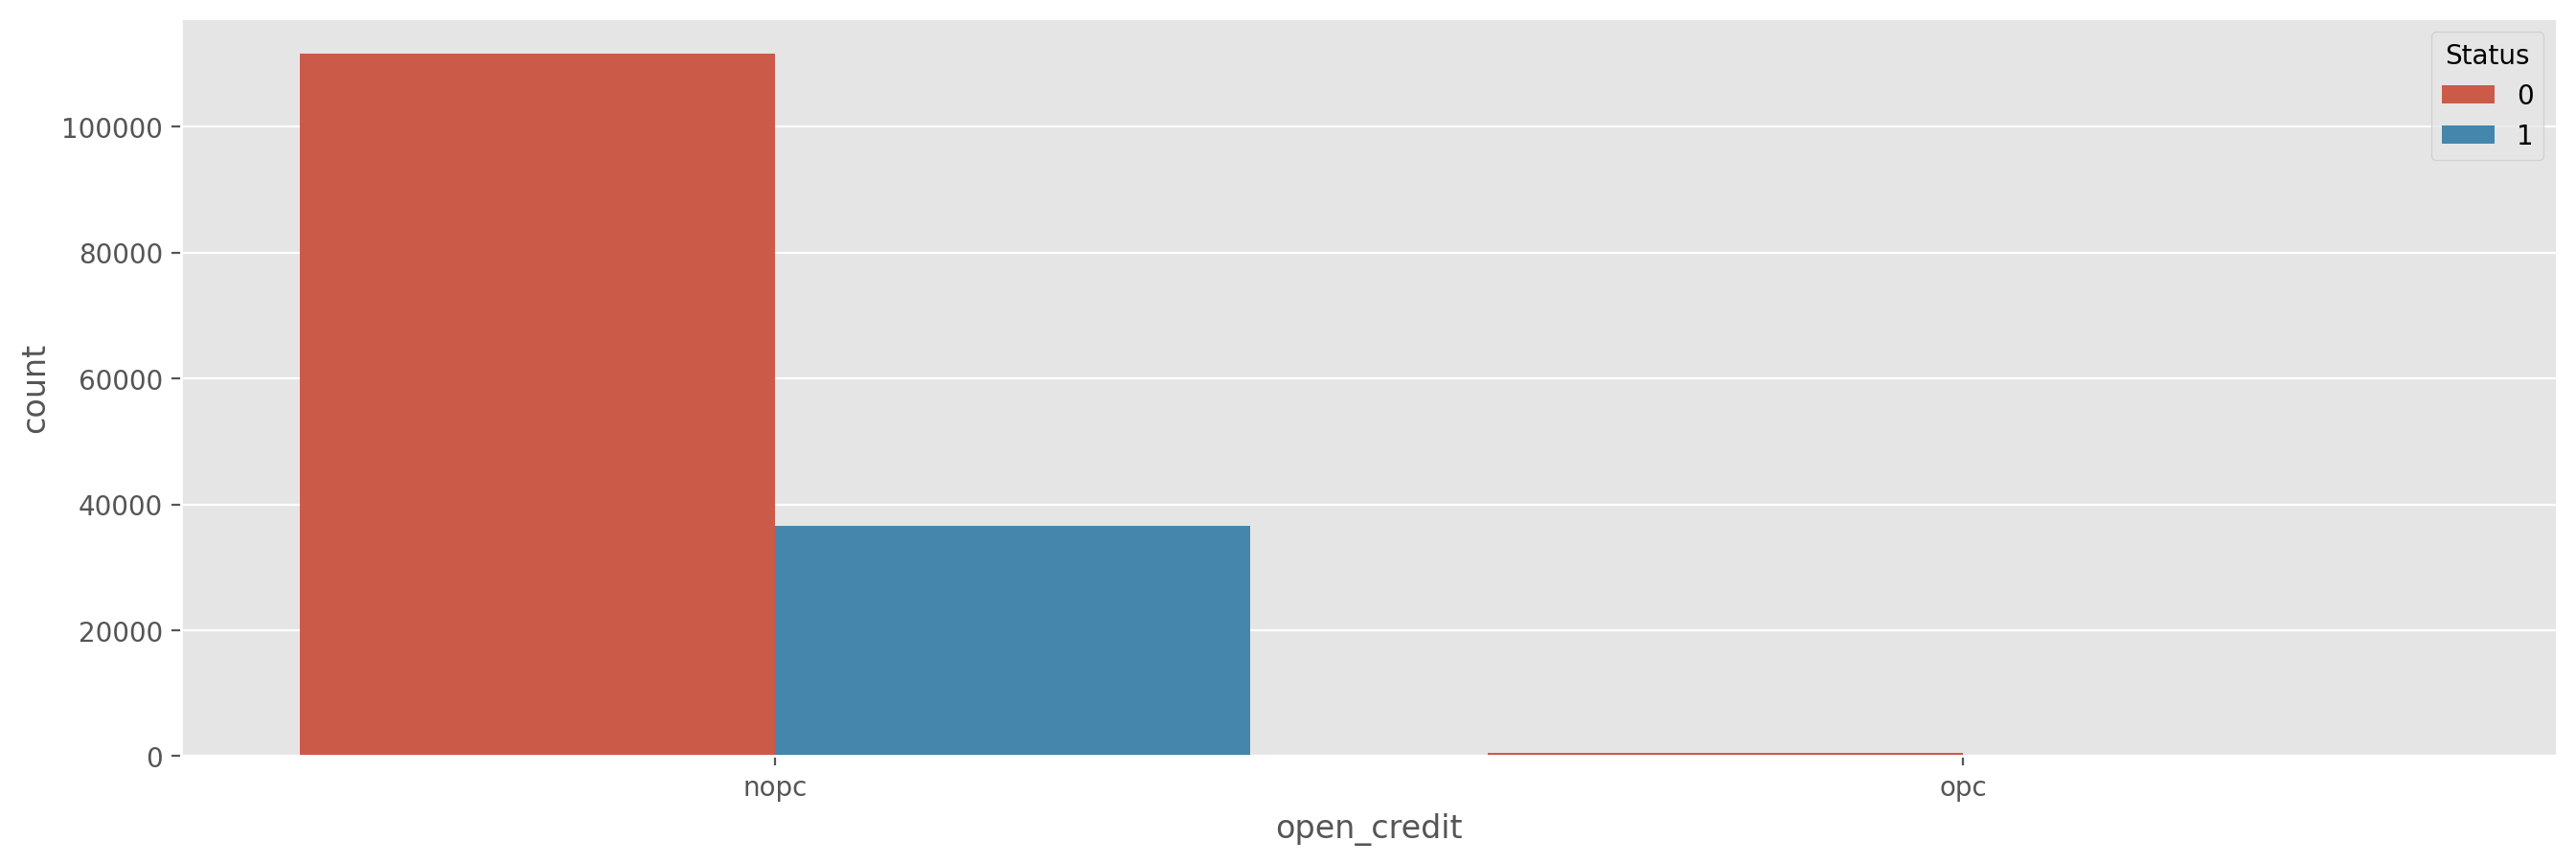

In [26]:
plt.figure(figsize = (16,5), dpi = 200)
sns.countplot(x='open_credit',hue='Status',data = data) #open credit is not given 

<Axes: xlabel='Status', ylabel='Interest_rate_spread'>

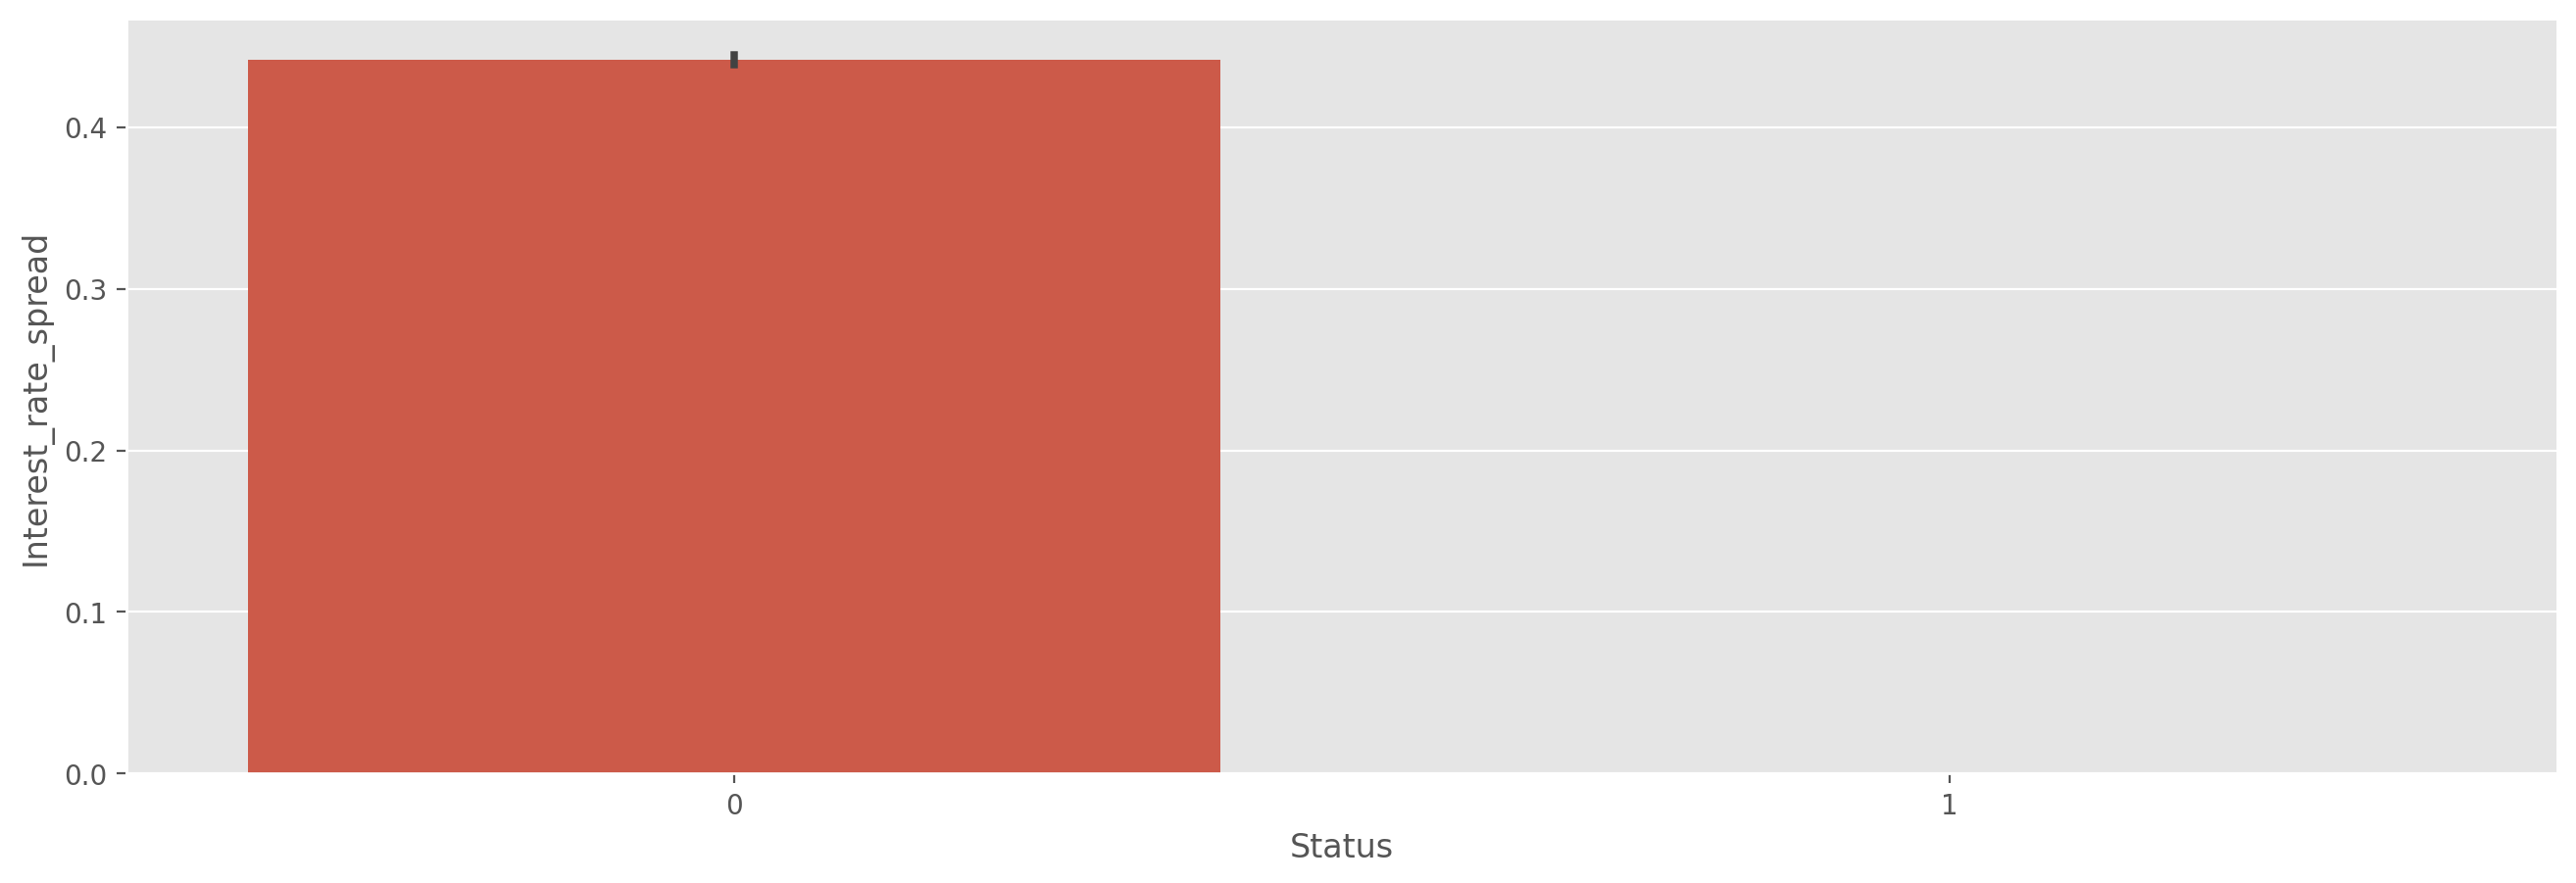

In [27]:
plt.figure(figsize = (16,5), dpi = 200)
sns.barplot(x='Status',y='Interest_rate_spread',data = data) #0status have interest rate spread 

<Axes: xlabel='Status', ylabel='count'>

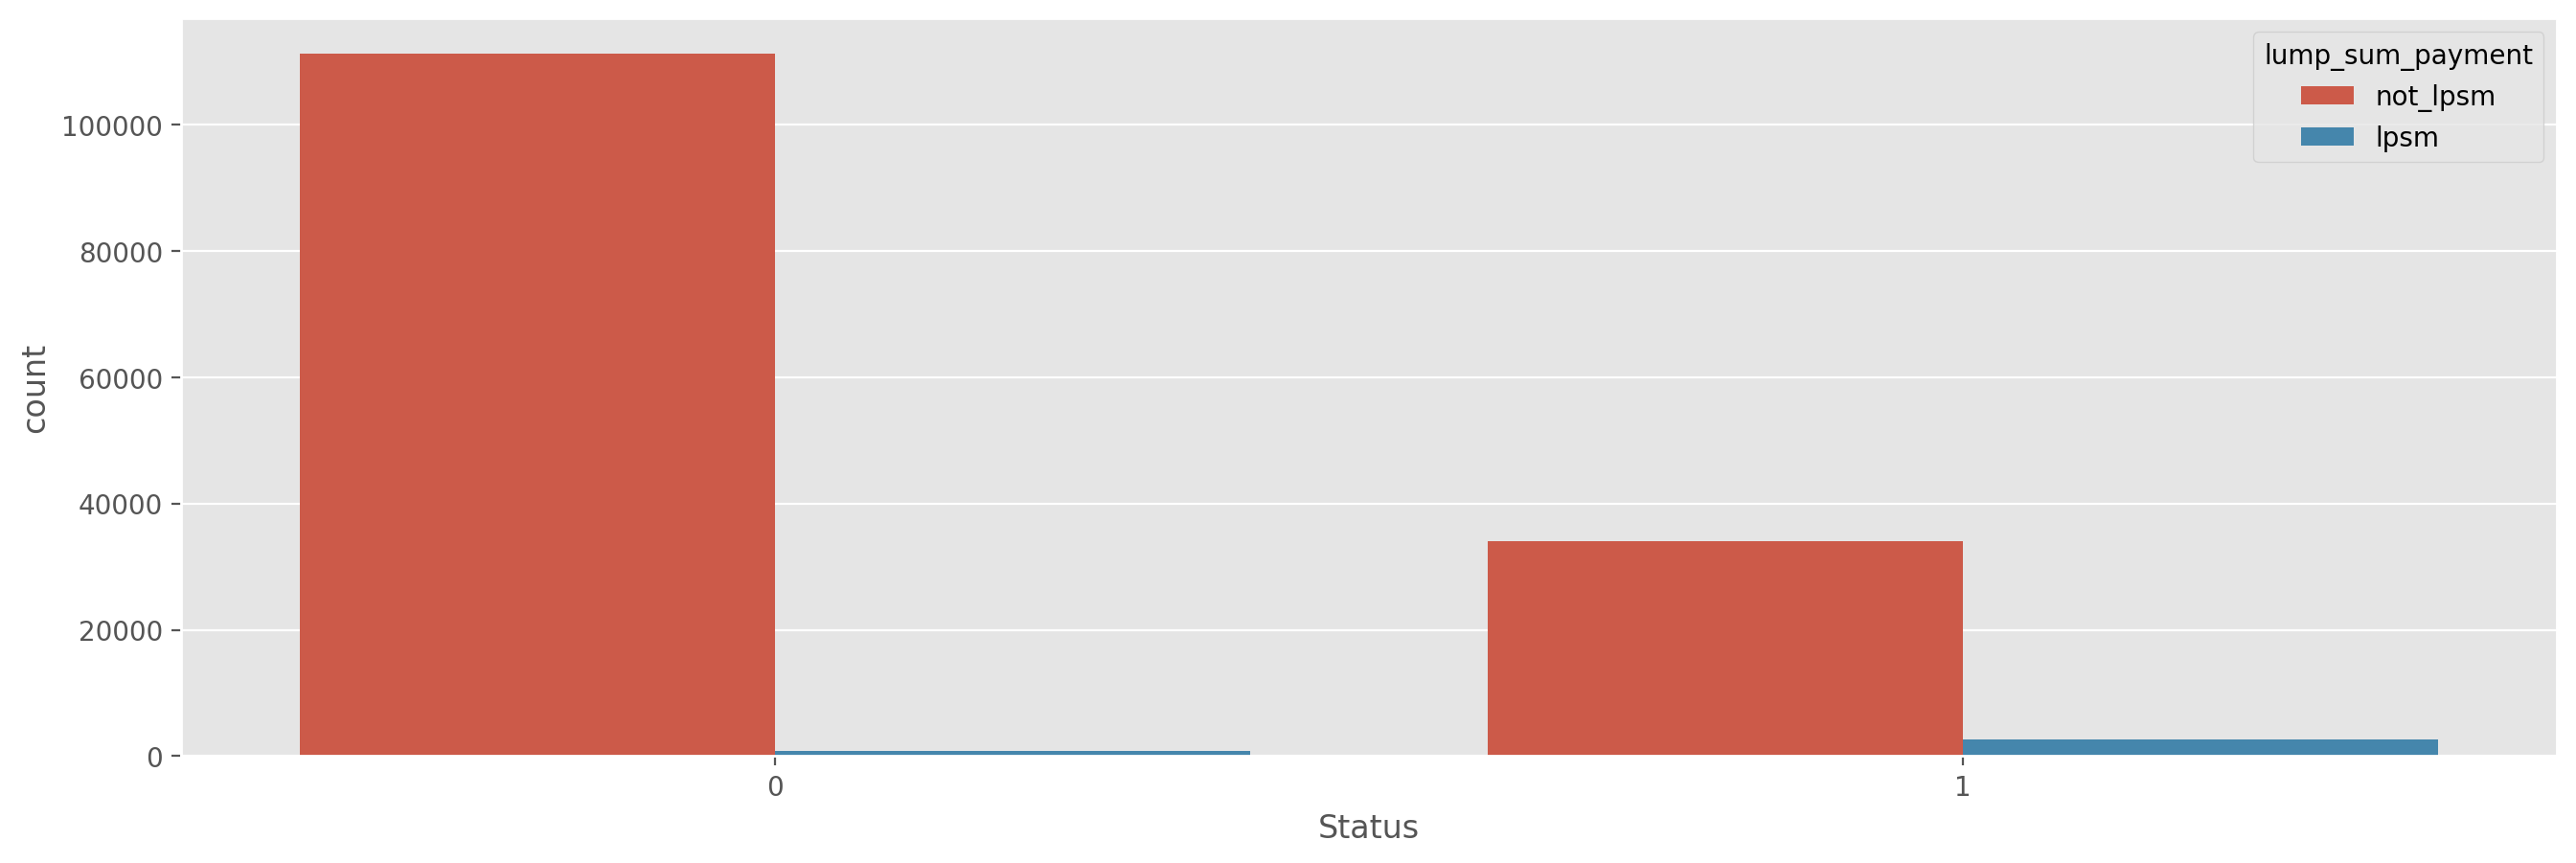

In [28]:
plt.figure(figsize = (16,5), dpi = 200)
sns.countplot(x='Status',hue='lump_sum_payment',data = data) #lumpsu amount is not encouragable

<Axes: xlabel='Status', ylabel='property_value'>

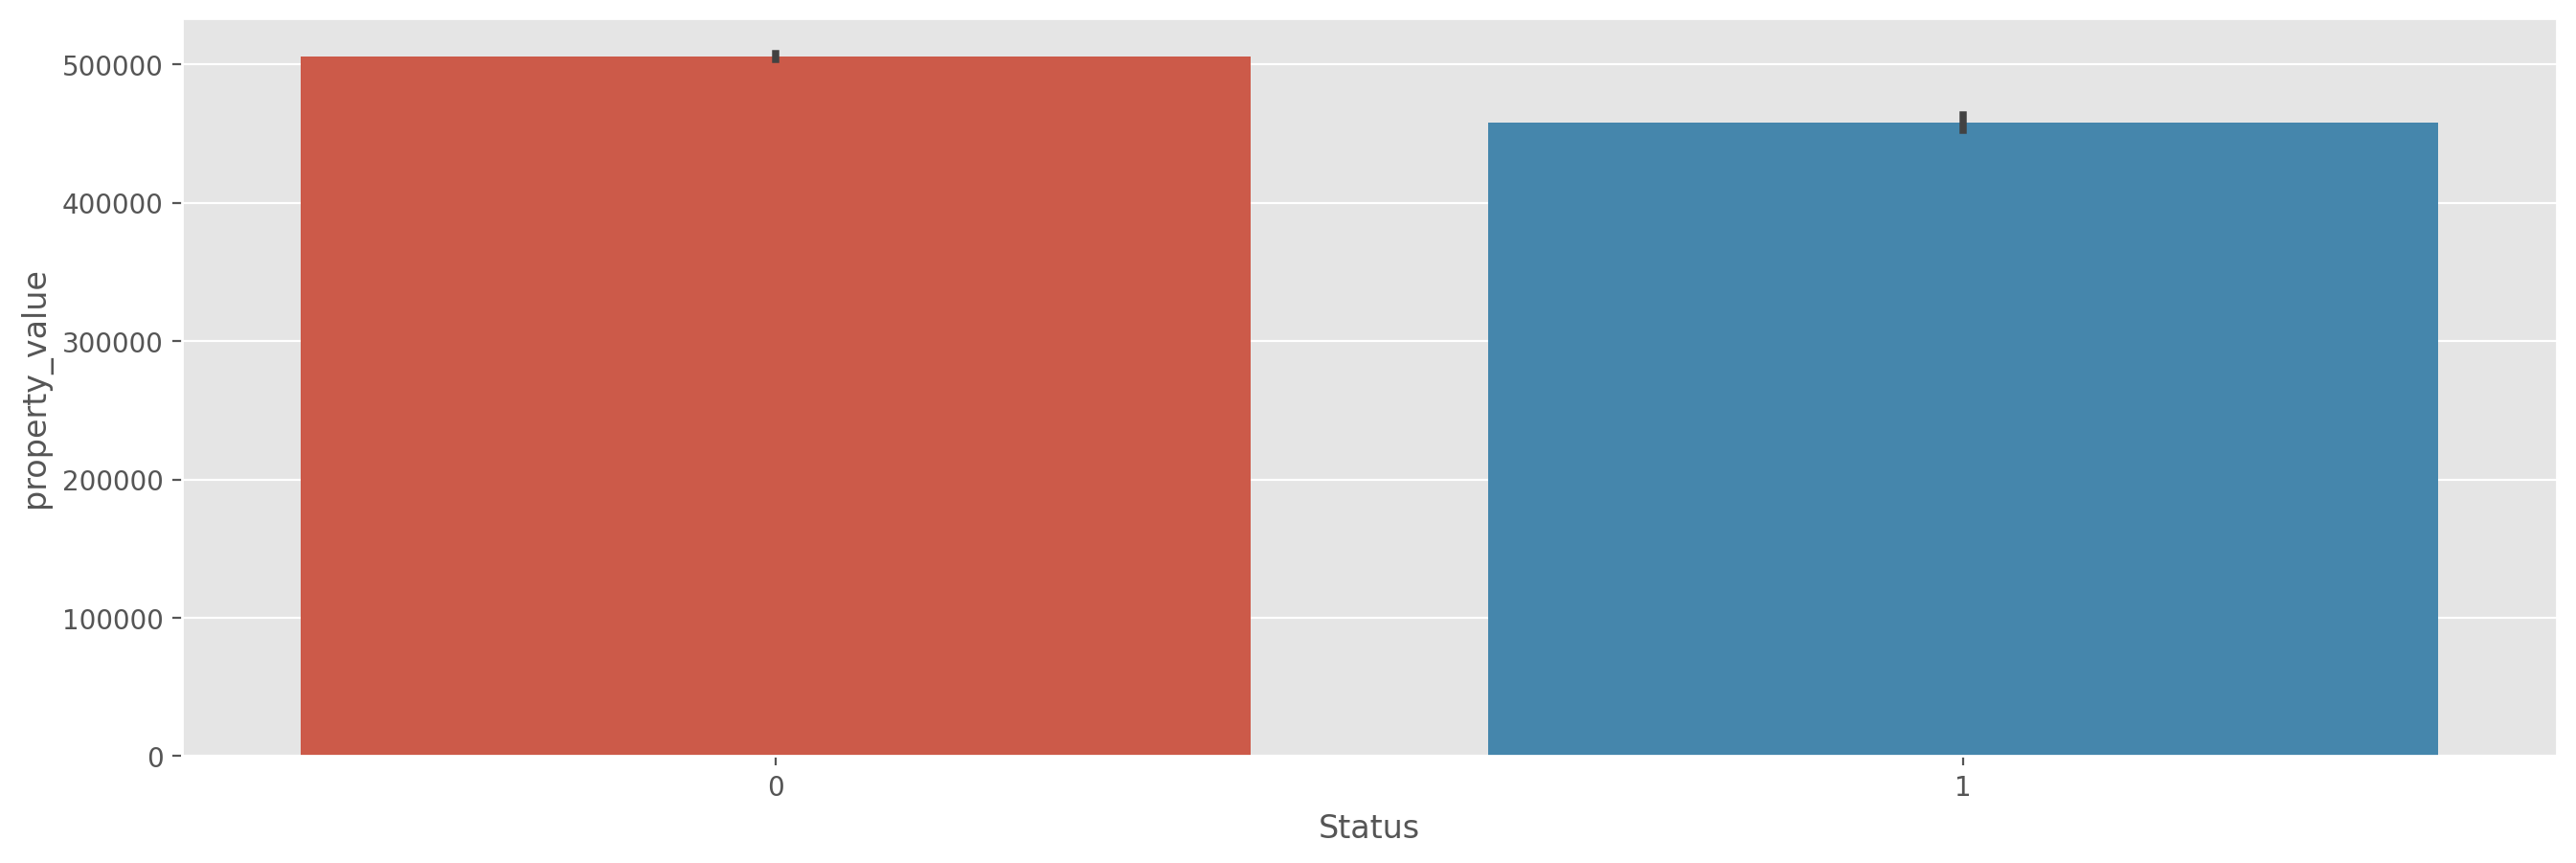

In [29]:
plt.figure(figsize = (16,5), dpi = 200)
sns.barplot(x='Status',y='property_value',data = data) #0status have high property value

<Axes: xlabel='Status', ylabel='count'>

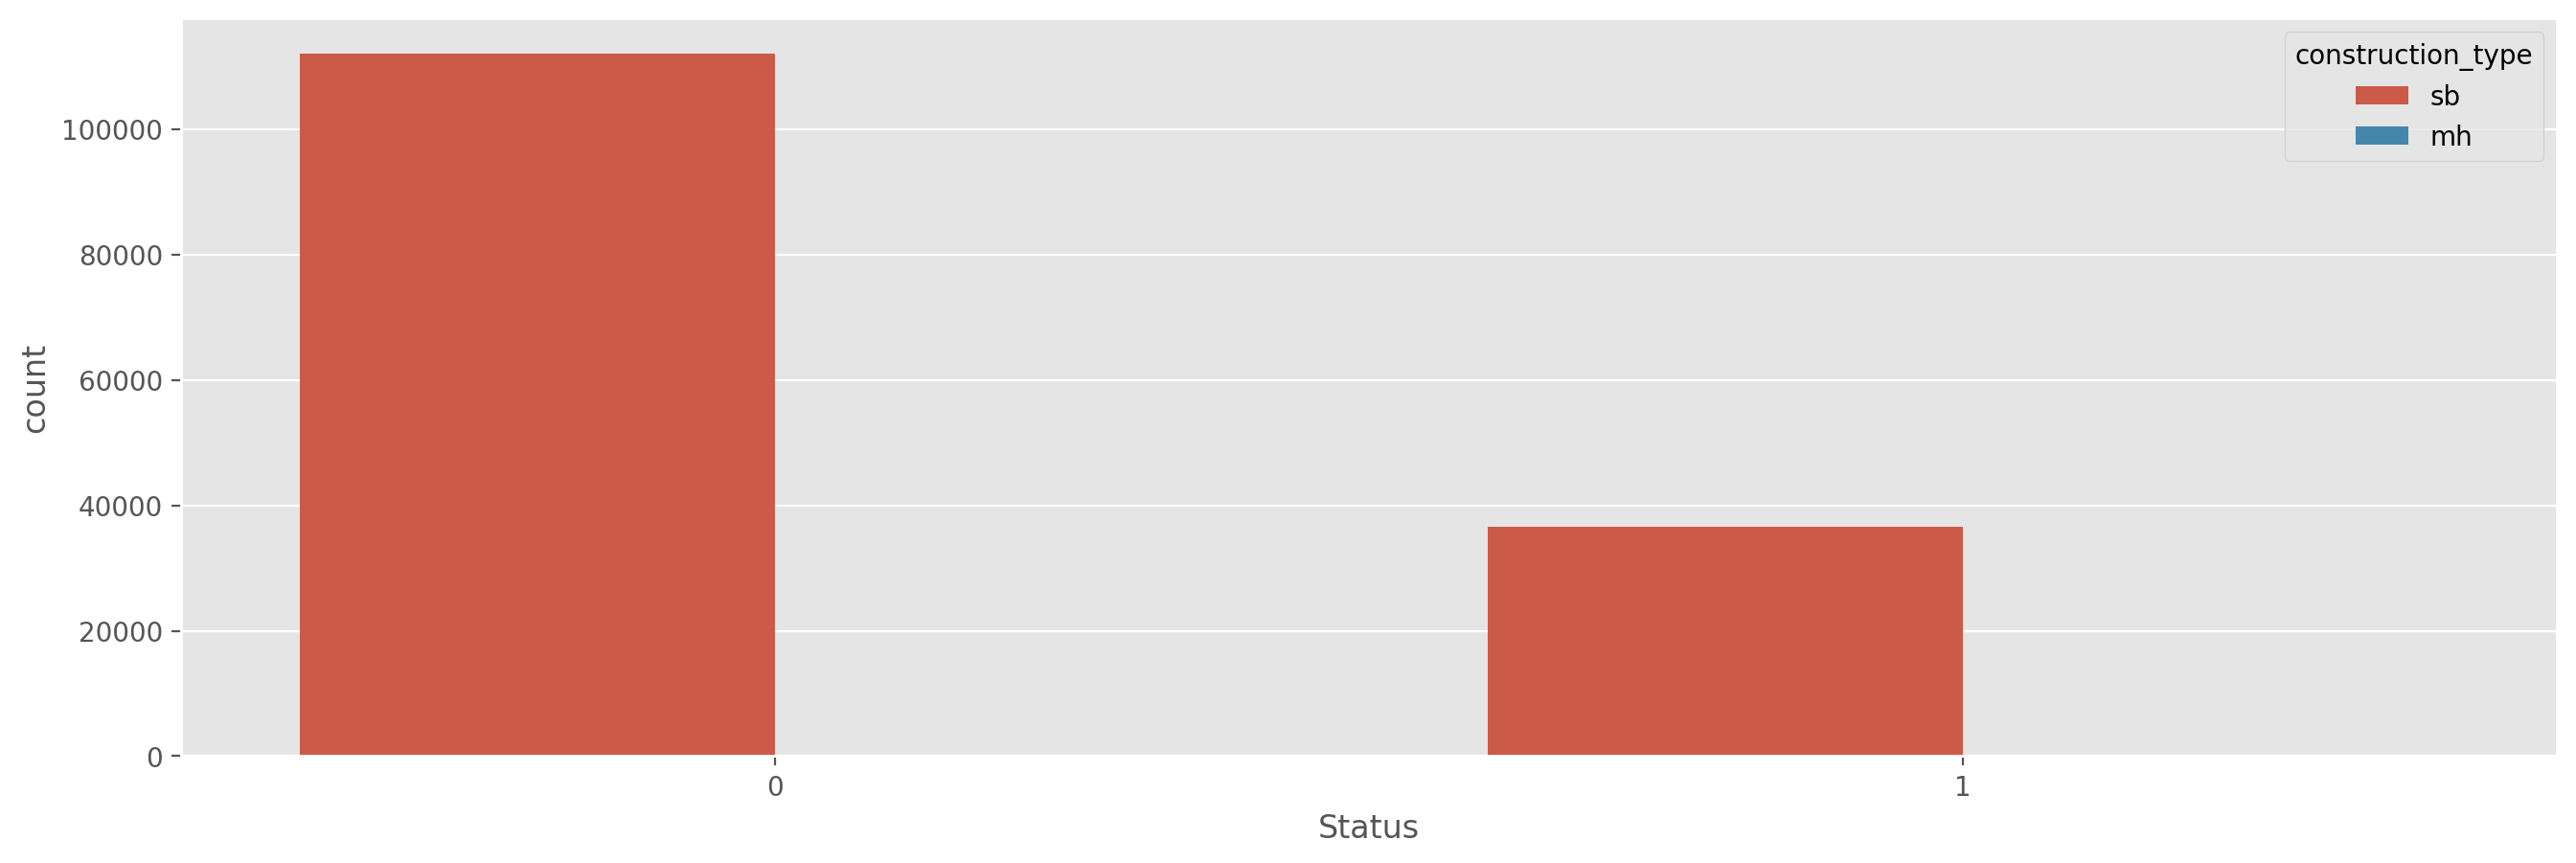

In [30]:
plt.figure(figsize = (16,5), dpi = 200)
sns.countplot(x='Status',hue='construction_type',data = data) #sb type construction is more

<Axes: xlabel='age', ylabel='income'>

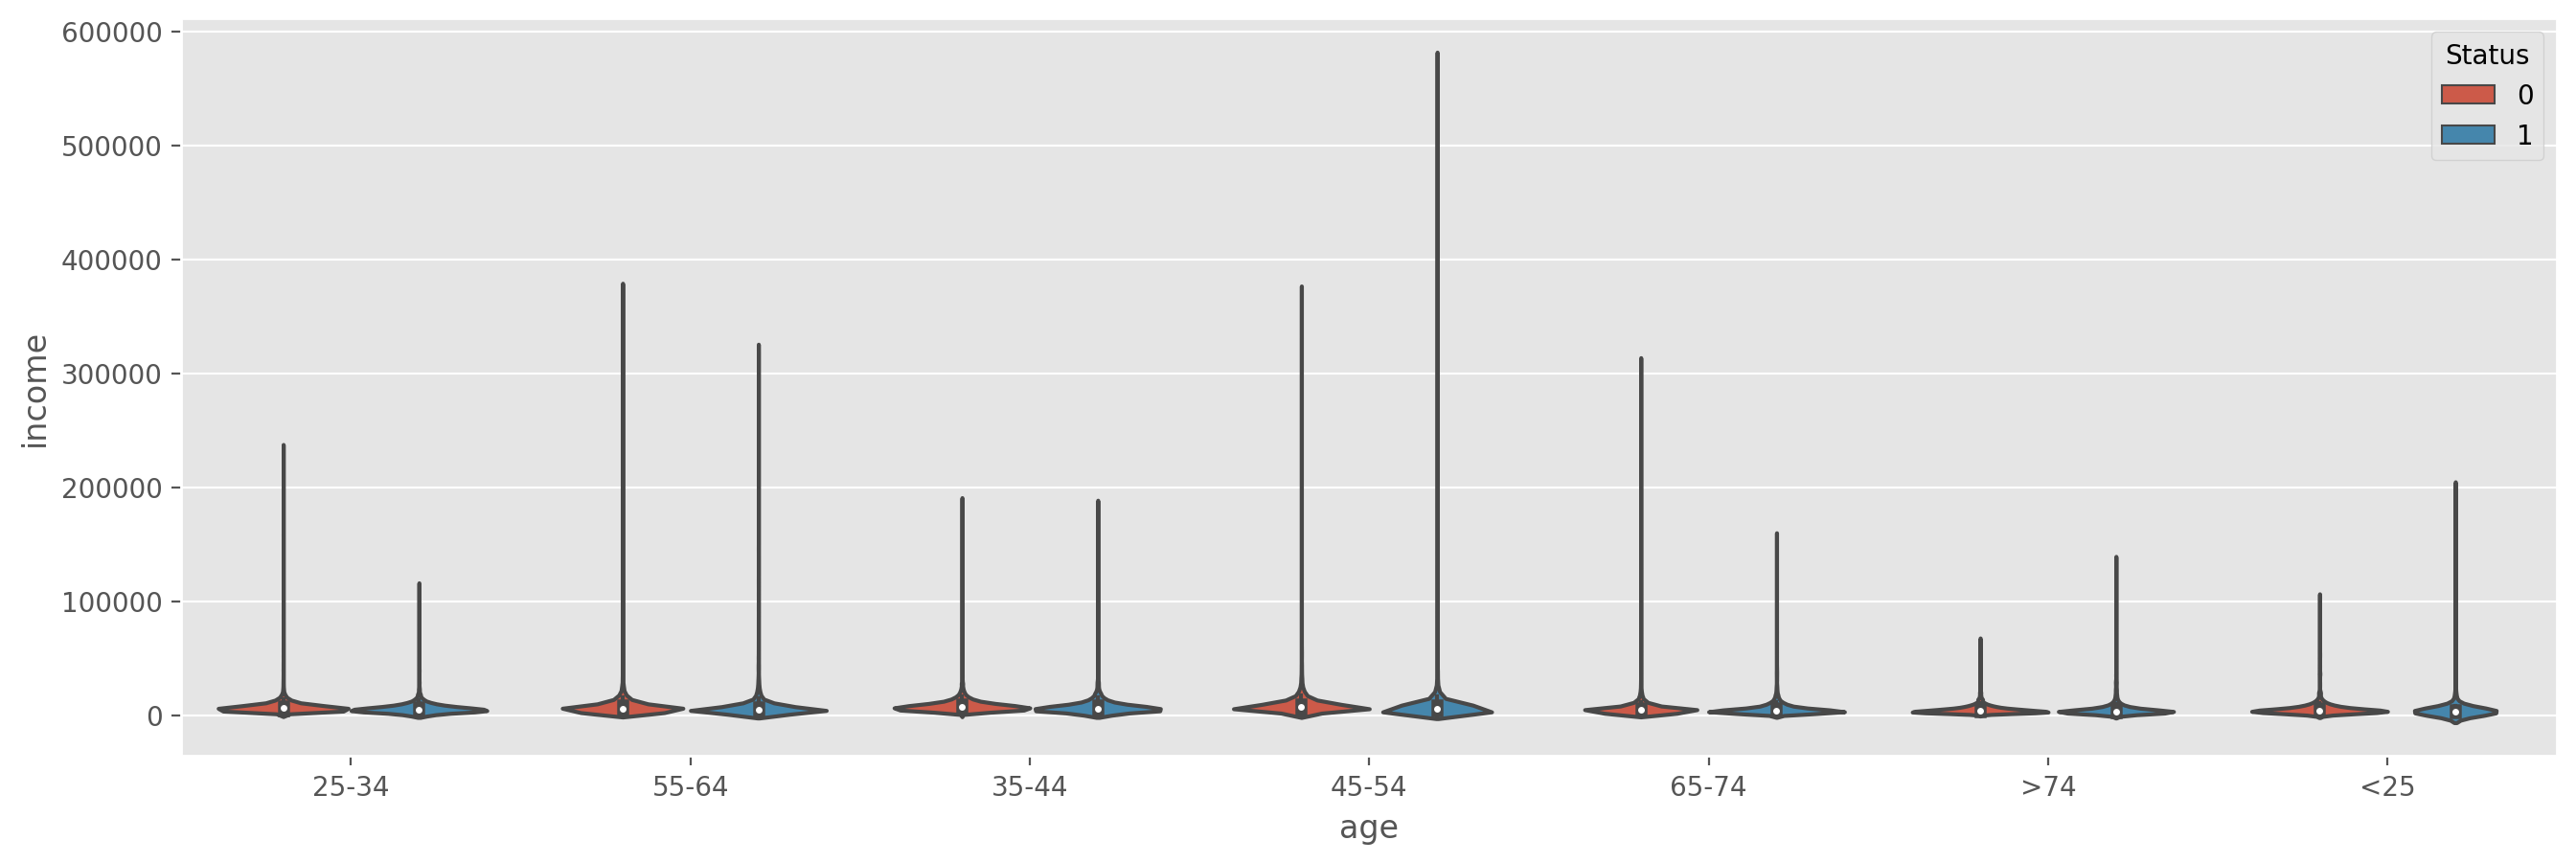

In [31]:
plt.figure(figsize = (16,5), dpi = 200)
sns.violinplot(x='age',y='income',hue='Status',data = data) #45-50 age group income is more

<Axes: xlabel='Credit_Score', ylabel='loan_amount'>

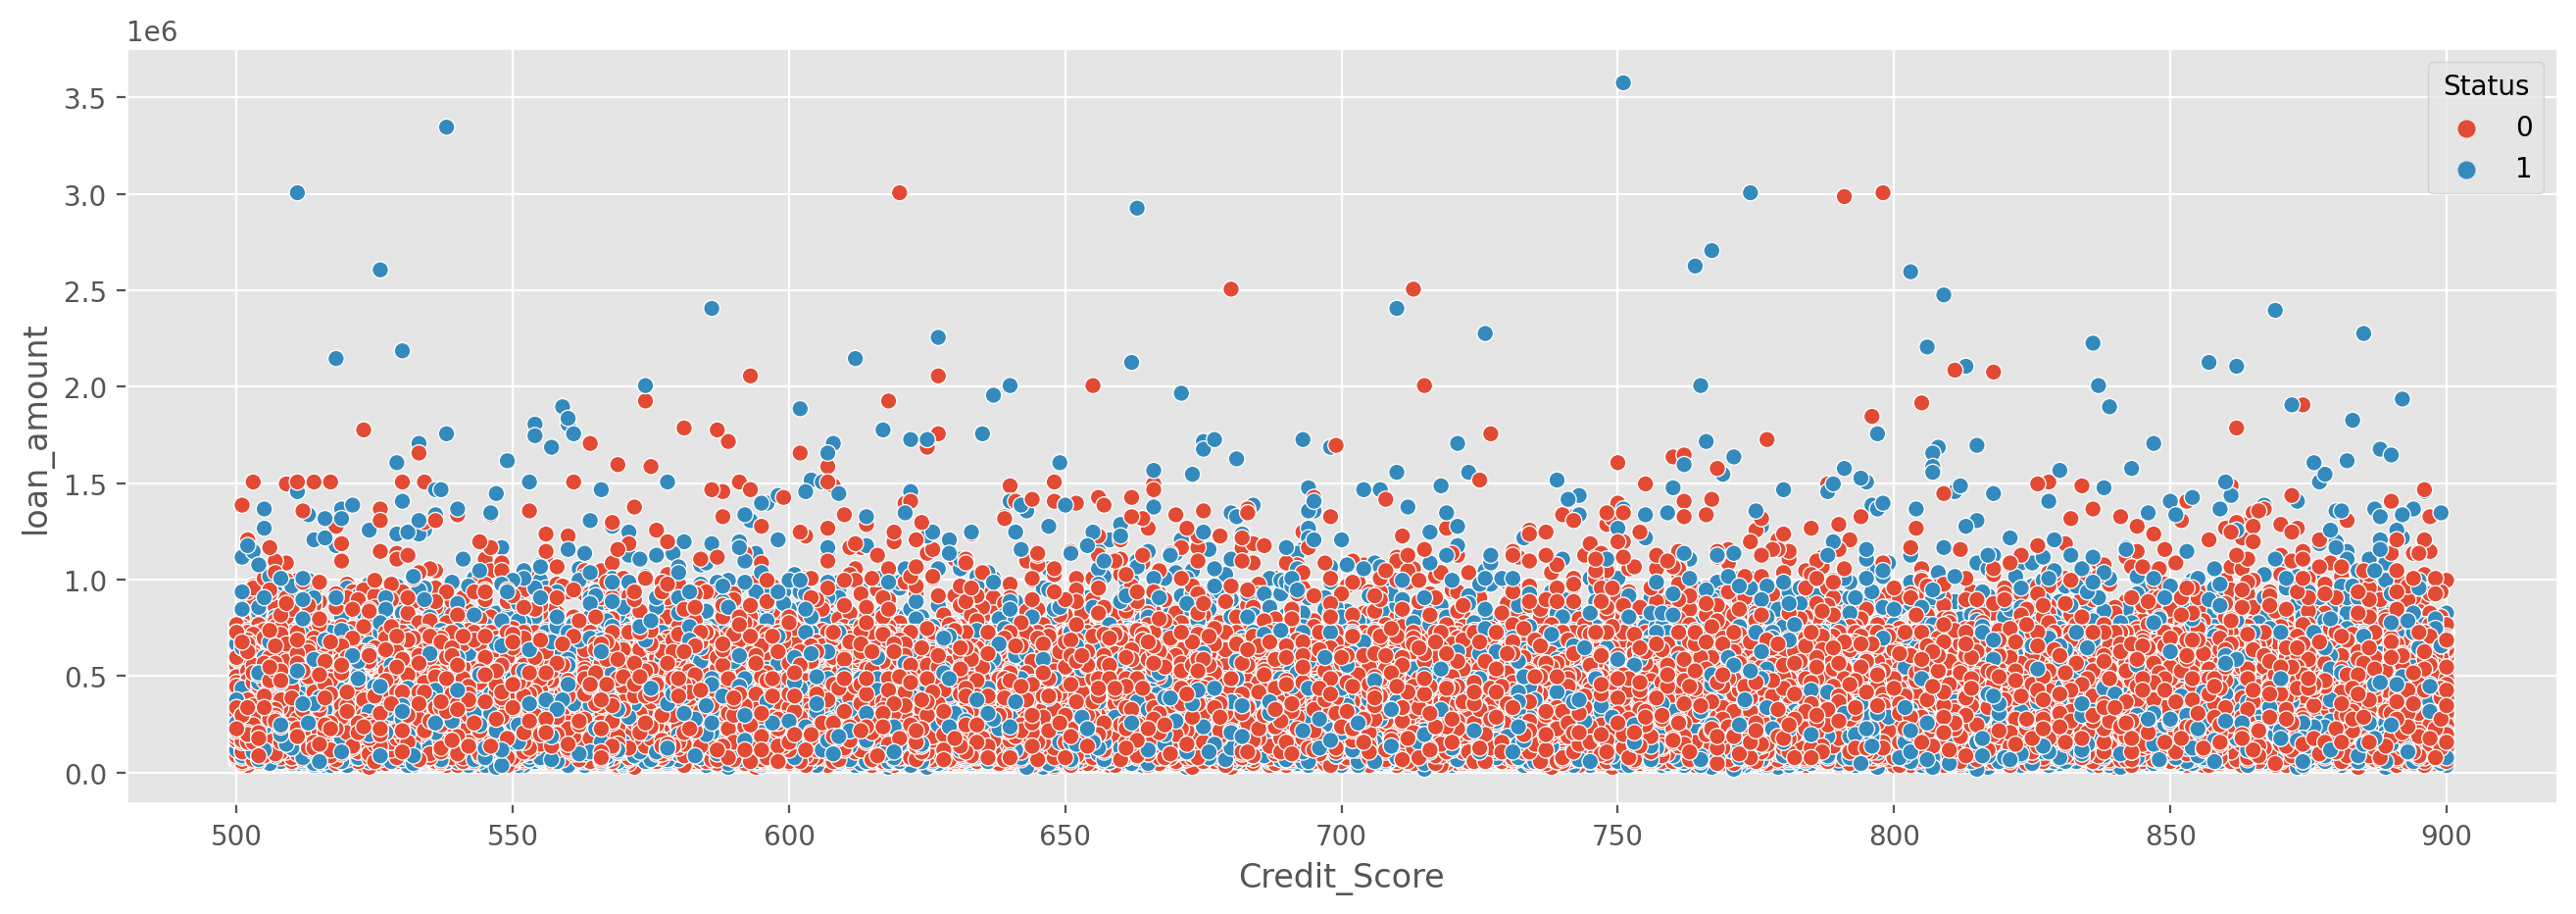

In [32]:
plt.figure(figsize = (16,5), dpi = 200)
sns.scatterplot(x='Credit_Score',y='loan_amount',hue='Status',data = data) #high loan given for high credit score and given 0 status

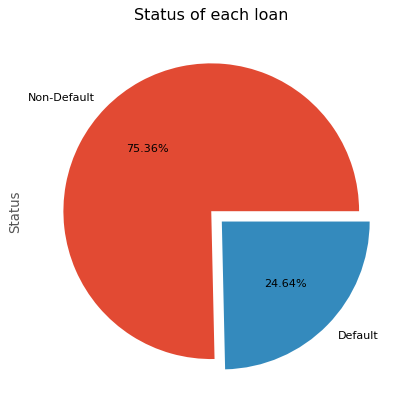

In [33]:
plt.figure(figsize=(12,6),dpi=80)
data.Status.value_counts().plot(x=None,y=None,labels=['Non-Default','Default'],explode=[0,0.1],kind='pie',autopct='%1.2f%%')
plt.title('Status of each loan')
plt.show() #default data is given less

In [34]:
# class count
status_count_0, status_count_1 = data['Status'].value_counts()

# Separate class
no_default = data[data['Status'] == 0]
default = data[data['Status'] == 1]# print the shape of the class
print('Status_0:', no_default.shape)
print('Status_1:', default.shape)

Status_0: (112031, 34)
Status_1: (36639, 34)


total status of 1 and0: 0    36639
1    36639
Name: Status, dtype: int64


<Axes: title={'center': 'count (target)'}>

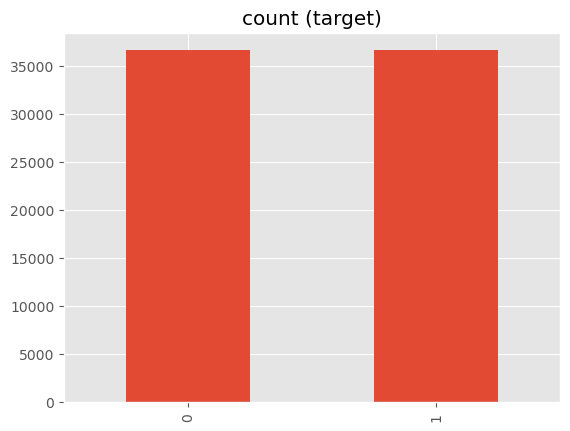

In [35]:
no_default_under = no_default.sample(status_count_1)

test_under = pd.concat([no_default_under, default], axis=0)

print("total status of 1 and0:",test_under['Status'].value_counts())# plot the count after under-sampeling
test_under['Status'].value_counts().plot(kind='bar', title='count (target)')

In [36]:
new_data=test_under.sample(status_count_1,random_state=42)

new_data.head()#create new sample

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
74719,99609,2019,cf,Male,nopre,type1,p3,l1,nopc,nob/c,...,CRIF,615,EXP,55-64,to_inst,61.554622,North,direct,0,47.0
41234,66124,2019,NaN,Sex Not Available,nopre,type1,p4,l1,nopc,nob/c,...,EQUI,854,EXP,45-54,to_inst,NaN,south,direct,1,NaN
110898,135788,2019,cf,Male,nopre,type2,p4,l1,nopc,b/c,...,EQUI,803,EXP,55-64,to_inst,NaN,south,direct,1,NaN
118379,143269,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EQUI,714,EXP,25-34,to_inst,NaN,south,direct,1,NaN
117586,142476,2019,cf,Female,nopre,type1,p1,l2,nopc,nob/c,...,EQUI,525,EXP,>74,to_inst,NaN,North,direct,1,NaN


In [37]:
new_data['Status'].value_counts() #value counts of status

0    18321
1    18318
Name: Status, dtype: int64

In [38]:
new_data.columns #columms

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [39]:
new_data.isnull().sum() #check null values

ID                               0
year                             0
loan_limit                     823
Gender                           0
approv_in_adv                  226
loan_type                        0
loan_purpose                    34
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             18225
Interest_rate_spread         18318
Upfront_charges              18737
term                            12
Neg_ammortization               30
interest_only                    0
lump_sum_payment                 0
property_value                7458
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        1965
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                             93
submission_of_applic

In [40]:
new_data.loan_limit.replace(np.nan,new_data.loan_limit.dropna().mode()[0],inplace=True)
new_data.approv_in_adv.replace(np.nan,new_data.approv_in_adv.dropna().mode()[0], inplace = True)
new_data.loan_purpose.replace(np.nan,new_data.loan_purpose.dropna().mode()[0], inplace = True)
new_data.rate_of_interest.replace(np.nan, new_data.rate_of_interest.mean(), inplace = True)
new_data.property_value.replace(np.nan, new_data.property_value.mean(), inplace = True)
new_data.income.replace(np.nan, new_data.income.mean(), inplace = True)
new_data.age.replace(np.nan, new_data.age.mode()[0], inplace= True)#drop missing values

In [41]:
cols=['loan_limit','Gender','approv_in_adv','loan_type','loan_purpose','Credit_Worthiness','business_or_commercial','loan_amount','rate_of_interest','lump_sum_payment','property_value','construction_type','income','credit_type','Credit_Score','age','Region']
X=new_data[cols]
Y=new_data[['Status']] #feature engineering

In [42]:
X.head(10)#xdata

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,business_or_commercial,loan_amount,rate_of_interest,lump_sum_payment,property_value,construction_type,income,credit_type,Credit_Score,age,Region
74719,cf,Male,nopre,type1,p3,l1,nob/c,146500,4.990000,not_lpsm,238000.000000,sb,3360.0,CRIF,615,55-64,North
41234,cf,Sex Not Available,nopre,type1,p4,l1,nob/c,396500,4.042401,not_lpsm,485598.094651,sb,4260.0,EQUI,854,45-54,south
110898,cf,Male,nopre,type2,p4,l1,b/c,506500,4.042401,not_lpsm,485598.094651,sb,0.0,EQUI,803,55-64,south
118379,cf,Sex Not Available,nopre,type1,p1,l1,nob/c,56500,4.042401,not_lpsm,485598.094651,sb,960.0,EQUI,714,25-34,south
117586,cf,Female,nopre,type1,p1,l2,nob/c,166500,4.042401,not_lpsm,485598.094651,sb,2340.0,EQUI,525,>74,North
108018,cf,Joint,pre,type1,p4,l1,nob/c,416500,3.990000,not_lpsm,658000.000000,sb,8040.0,EXP,755,45-54,south
93693,cf,Joint,nopre,type1,p3,l1,nob/c,446500,3.500000,not_lpsm,758000.000000,sb,8700.0,CIB,635,35-44,central
27016,cf,Joint,nopre,type1,p4,l1,nob/c,596500,4.042401,not_lpsm,485598.094651,sb,16140.0,EQUI,629,45-54,North
21118,ncf,Joint,nopre,type1,p4,l1,nob/c,856500,4.042401,not_lpsm,978000.000000,sb,16980.0,CRIF,569,25-34,south
85034,cf,Sex Not Available,pre,type1,p3,l1,nob/c,156500,4.042401,not_lpsm,278000.000000,sb,1920.0,EXP,647,55-64,south


In [43]:
Y.head(10)#ycolumns

,Status
74719,0
41234,1
110898,1
118379,1
117586,1
108018,0
93693,0
27016,1
21118,1
85034,1


In [45]:
X['loan_limit']=X.loan_limit.map({'cf':0,'ncf':1})
X['Gender']=X.Gender.map({'Sex Not Available':0,'Male':1,'Joint':2,'Female':3})
X['approv_in_adv']=X.approv_in_adv.map({'nopre':0,'pre':1})
X['loan_type']=X.loan_type.map({'type1':0,'type2':1,'type3':2})
X['loan_purpose']=X.loan_purpose.map({'p1':0,'p2':1,'p3':2,'p4':4})
X['Credit_Worthiness']=X.Credit_Worthiness.map({'l1':0,'l2':1})
X['business_or_commercial']=X.business_or_commercial.map({'nob/c':0,'b/c':1})
X['lump_sum_payment']=X.lump_sum_payment.map({'not_lpsm':0,'lpsm':1})
X['construction_type']=X.construction_type.map({'sb':0,'mh':1})
X['credit_type']=X.credit_type.map({'EXP':0,'EQUI':1,'CRIF':2,'CIB':3})
X['Region']=X.Region.map({'south':0,'North':1,'central':2,'North-East':2})#change categorical columns to numerical

In [46]:
# Binning (Creating Bands)
X.loc[X.age =='<25','age']=0
X.loc[X.age == '25-34','age'] = 1
X.loc[X.age == '35-44', 'age'] = 2
X.loc[X.age == '45-54', 'age'] = 3
X.loc[X.age == '55-64', 'age'] = 4
X.loc[X.age == '65-74', 'age'] = 5
X.loc[X.age =='>74', 'age'] = 6

X.head(10)#age column to numerical

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,business_or_commercial,loan_amount,rate_of_interest,lump_sum_payment,property_value,construction_type,income,credit_type,Credit_Score,age,Region
74719,0,1,0,0,2,0,0,146500,4.990000,0,238000.000000,0,3360.0,2,615,4,1
41234,0,0,0,0,4,0,0,396500,4.042401,0,485598.094651,0,4260.0,1,854,3,0
110898,0,1,0,1,4,0,1,506500,4.042401,0,485598.094651,0,0.0,1,803,4,0
118379,0,0,0,0,0,0,0,56500,4.042401,0,485598.094651,0,960.0,1,714,1,0
117586,0,3,0,0,0,1,0,166500,4.042401,0,485598.094651,0,2340.0,1,525,6,1
108018,0,2,1,0,4,0,0,416500,3.990000,0,658000.000000,0,8040.0,0,755,3,0
93693,0,2,0,0,2,0,0,446500,3.500000,0,758000.000000,0,8700.0,3,635,2,2
27016,0,2,0,0,4,0,0,596500,4.042401,0,485598.094651,0,16140.0,1,629,3,1
21118,1,2,0,0,4,0,0,856500,4.042401,0,978000.000000,0,16980.0,2,569,1,0
85034,0,0,1,0,2,0,0,156500,4.042401,0,278000.000000,0,1920.0,0,647,4,0


In [47]:
# Min Max Scaler
cols=[ 'income','loan_amount','Credit_Score','property_value']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X[cols] = scaler.fit_transform(X[cols])
X.head(10)

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,business_or_commercial,loan_amount,rate_of_interest,lump_sum_payment,property_value,construction_type,income,credit_type,Credit_Score,age,Region
74719,0,1,0,0,2,0,0,0.043478,4.990000,0,0.019167,0,0.008907,2,0.2875,4,1
41234,0,0,0,0,4,0,0,0.127090,4.042401,0,0.039800,0,0.011293,1,0.8850,3,0
110898,0,1,0,1,4,0,1,0.163880,4.042401,0,0.039800,0,0.000000,1,0.7575,4,0
118379,0,0,0,0,0,0,0,0.013378,4.042401,0,0.039800,0,0.002545,1,0.5350,1,0
117586,0,3,0,0,0,1,0,0.050167,4.042401,0,0.039800,0,0.006203,1,0.0625,6,1
108018,0,2,1,0,4,0,0,0.133779,3.990000,0,0.054167,0,0.021314,0,0.6375,3,0
93693,0,2,0,0,2,0,0,0.143813,3.500000,0,0.062500,0,0.023063,3,0.3375,2,2
27016,0,2,0,0,4,0,0,0.193980,4.042401,0,0.039800,0,0.042787,1,0.3225,3,1
21118,1,2,0,0,4,0,0,0.280936,4.042401,0,0.080833,0,0.045014,2,0.1725,1,0
85034,0,0,1,0,2,0,0,0.046823,4.042401,0,0.022500,0,0.005090,0,0.3675,4,0


In [48]:
 #Splitting The Data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2)

In [49]:
print('Training Data Shape   : ', x_train.shape)
print('Training Labels Shape : ', y_train.shape)
print('Testing Data Shape    : ', x_test.shape)
print('Testing Labels Shape  : ', y_test.shape)#data shape

Training Data Shape   :  (29311, 17)
Training Labels Shape :  (29311, 1)
Testing Data Shape    :  (7328, 17)
Testing Labels Shape  :  (7328, 1)


In [50]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)
classifier.fit(x_train, y_train)

pred_train = classifier.predict(x_train)
pred_test  = classifier.predict(x_test)#1st model

In [86]:
from sklearn.metrics import precision_score
print('Training Set Accuracy : ', precision_score(y_train, pred_train))
print('Testing Set Accuracy  : ', precision_score(y_test, pred_test))#model score

Training Set Accuracy :  1.0
Testing Set Accuracy  :  1.0


In [70]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 30, criterion = 'entropy', max_depth = 10)
classifier.fit(x_train, y_train)#2nd model

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=30)

In [71]:
pred_train = classifier.predict(x_train)
pred_test  = classifier.predict(x_test)#prediction

In [87]:
from sklearn.metrics import accuracy_score
print('Training Set Accuracy : ',precision_score(y_train, pred_train))
print('Testing Set Accuracy  : ', precision_score(y_test, pred_test))#model score

Training Set Accuracy :  1.0
Testing Set Accuracy  :  1.0


In [76]:
from sklearn.tree import DecisionTreeClassifier
estimator = DecisionTreeClassifier(max_depth = 5, criterion = 'entropy')

from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier(estimator, n_estimators = 20)
classifier.fit(x_train, y_train)#3rd model

AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                    max_depth=5),
                   n_estimators=20)

In [77]:
pred_train = classifier.predict(x_train)
pred_test = classifier.predict(x_test)

print('Training Set Accuracy : ', precision_score(y_train, pred_train))
print('Testing Set Accuracy  : ', precision_score(y_test, pred_test))#predicttion an score

Training Set Accuracy :  1.0
Testing Set Accuracy  :  0.9998635371179039


In [66]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()#hyper tuning

In [67]:
search_params = {
    'n_estimators' : [10,20,30,40,50],
    'max_depth'    : [3,4,5,6,8,10],
    'max_features' : [3,4,5,6]
}#parameters

In [68]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = search_params,
                           scoring = ['r2'],
                           cv = 5,
                           refit = 'r2',
                           verbose = 1)
grid_search.fit(x_train, y_train)#tune the parameters

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 8, 10],
                         'max_features': [3, 4, 5, 6],
                         'n_estimators': [10, 20, 30, 40, 50]},
             refit='r2', scoring=['r2'], verbose=1)

In [69]:
best_model = grid_search.best_estimator_
best_model#best model

RandomForestClassifier(max_depth=10, max_features=5, n_estimators=30)

In [73]:
from sklearn.model_selection import RandomizedSearchCV
randomized_search = RandomizedSearchCV(estimator = classifier,
                                       param_distributions = search_params,
                                       scoring = ['r2'],
                                       cv = 5,
                                       refit = 'r2',
                                       n_iter = 20,
                                       verbose = 3)
randomized_search.fit(x_train, y_train)#2nd tuning hyperparameters

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END max_depth=8, max_features=5, n_estimators=20; r2: (test=0.999) total time=   0.2s
[CV 2/5] END max_depth=8, max_features=5, n_estimators=20; r2: (test=0.999) total time=   0.2s
[CV 3/5] END max_depth=8, max_features=5, n_estimators=20; r2: (test=1.000) total time=   0.2s
[CV 4/5] END max_depth=8, max_features=5, n_estimators=20; r2: (test=0.999) total time=   0.2s
[CV 5/5] END max_depth=8, max_features=5, n_estimators=20; r2: (test=0.999) total time=   0.2s
[CV 1/5] END max_depth=3, max_features=3, n_estimators=30; r2: (test=0.676) total time=   0.1s
[CV 2/5] END max_depth=3, max_features=3, n_estimators=30; r2: (test=0.652) total time=   0.1s
[CV 3/5] END max_depth=3, max_features=3, n_estimators=30; r2: (test=0.635) total time=   0.1s
[CV 4/5] END max_depth=3, max_features=3, n_estimators=30; r2: (test=0.815) total time=   0.1s
[CV 5/5] END max_depth=3, max_features=3, n_estimators=30; r2: (test=0.833) total t

[CV 2/5] END max_depth=10, max_features=4, n_estimators=20; r2: (test=0.999) total time=   0.3s
[CV 3/5] END max_depth=10, max_features=4, n_estimators=20; r2: (test=0.999) total time=   0.2s
[CV 4/5] END max_depth=10, max_features=4, n_estimators=20; r2: (test=0.997) total time=   0.2s
[CV 5/5] END max_depth=10, max_features=4, n_estimators=20; r2: (test=0.998) total time=   0.2s
[CV 1/5] END max_depth=4, max_features=3, n_estimators=10; r2: (test=0.974) total time=   0.0s
[CV 2/5] END max_depth=4, max_features=3, n_estimators=10; r2: (test=0.799) total time=   0.0s
[CV 3/5] END max_depth=4, max_features=3, n_estimators=10; r2: (test=0.376) total time=   0.0s
[CV 4/5] END max_depth=4, max_features=3, n_estimators=10; r2: (test=0.876) total time=   0.0s
[CV 5/5] END max_depth=4, max_features=3, n_estimators=10; r2: (test=0.517) total time=   0.0s
[CV 1/5] END max_depth=10, max_features=5, n_estimators=20; r2: (test=1.000) total time=   0.3s
[CV 2/5] END max_depth=10, max_features=5, n_

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(criterion='entropy',
                                                    max_depth=10,
                                                    n_estimators=30),
                   n_iter=20,
                   param_distributions={'max_depth': [3, 4, 5, 6, 8, 10],
                                        'max_features': [3, 4, 5, 6],
                                        'n_estimators': [10, 20, 30, 40, 50]},
                   refit='r2', scoring=['r2'], verbose=3)

In [74]:
randomized_search.best_params_#best params

{'n_estimators': 20, 'max_features': 5, 'max_depth': 8}

In [75]:
randomized_search.best_score_#best score

0.9991811876480592

In [78]:
accuracy_score(y_test, pred_test)#evaluation matrix1

0.9998635371179039

In [88]:
cm = confusion_matrix(y_test, pred_test)#3 evaluation matrix
cm

array([[3640,    0],
       [   1, 3687]], dtype=int64)

In [89]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')#plot confusion matrix

Confusion matrix, without normalization


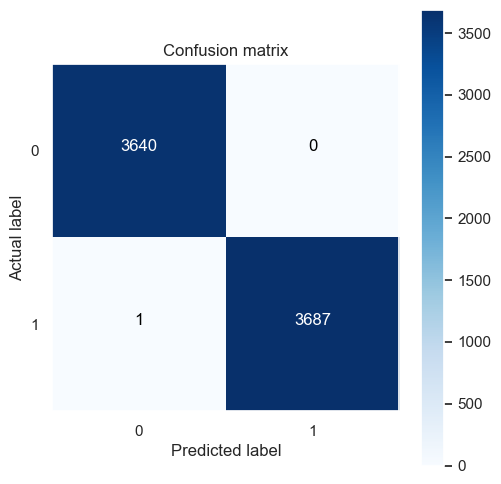

In [90]:
plt.figure(figsize = (5,5), dpi = 100)
sns.set(rc = {'axes.grid' : False})
plot_confusion_matrix(cm, [0,1])#cm

In [80]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, log_loss#import evaluation libraries

In [81]:
precision_score(y_test, pred_test)#evaluation 1

1.0

In [82]:
recall_score(y_test, pred_test)#2 evaluation

0.9997288503253796

In [83]:
f1_score(y_test, pred_test)#3rd evaluation

0.999864406779661

In [84]:
log_loss(y_test, pred_test)#4th evaluation

0.004918620822750927

In [91]:
confusion_matrix(y_test, pred_test)#cm

array([[3640,    0],
       [   1, 3687]], dtype=int64)

In [85]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_test))#classification report gives all its score

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3640
           1       1.00      1.00      1.00      3688

    accuracy                           1.00      7328
   macro avg       1.00      1.00      1.00      7328
weighted avg       1.00      1.00      1.00      7328

